In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import glob
import pandas as pd

matplotlib.rc('xtick', labelsize=24, direction='in') 
matplotlib.rc('ytick', labelsize=24, direction='in') 
matplotlib.rc('axes', labelsize=24) 

In [2]:
# Import the data
smss_list = glob.glob("../data/mwtd_abund_err_1121/*")
smss_line_dir = "../data/mwtd_lines_err_1121/"
bensby2005_td = pd.read_csv('../data/td_lit/bensby2005_tab9_TD_all.csv')
bensby2014_all = pd.read_csv('../data/td_lit/bensby2014_all.csv')
battistin2015_all = pd.read_csv('../data/td_lit/battistin2015_all.csv')
battistin2016_all = pd.read_csv('../data/td_lit/battistin2016_all.csv')
nissen2014_1 = pd.read_csv('../data/td_lit/nissen2014_all1.csv')
nissen2014_2 = pd.read_csv('../data/td_lit/nissen2014_all2.csv')
yong2013_halo = pd.read_csv('../data/td_lit/yong2013_table9_halo_all.csv')
barklem2005_halo = pd.read_csv('../data/td_lit/barklem2005_halo_xh.csv',index_col='JINA ID').T.reset_index(drop=True)
cayrel2004_halo = pd.read_csv('../data/td_lit/cayrel04_halo_all.csv',index_col='JINA ID').T.reset_index(drop=True)
sestito2019_all = pd.read_csv('../data/sestito_11_data/jina_7_plus_4_w_coord.csv',index_col='Index').T
sakari2018_all = pd.read_csv('../data/td_lit/sakari2018_all.txt',delim_whitespace=True)
orb_df = pd.read_csv('../data/MWTD_reclassified_1113.csv')
orb_df['map_name'] = orb_df['Name']

# Import NLTE or other correction
corr_elem = [106.0,11.0,13.0,27.0]
smss_co_nlte = pd.read_csv('nlte_correction/full79_co_nlte_corr.txt',delim_whitespace=True)
smss_c_evol = pd.read_csv('nlte_correction/full79_strpar_C_1129.txt',delim_whitespace=True)
smss_na_nlte = pd.read_csv('nlte_correction/dnlte_Na_1121.txt',delim_whitespace=True,skiprows=8)
smss_al_nlte = pd.read_csv('nlte_correction/dnlte_Al_1121.txt',delim_whitespace=True,skiprows=10)
print(smss_al_nlte.columns)
# Do a bit of preprocessing of nlte correction
# Need to decide what to do with the NLTE corrections
smss_na_nlte['dN5889'] = pd.to_numeric(smss_na_nlte['dN5889'],errors='coerce')
smss_na_nlte['dN5895'] = pd.to_numeric(smss_na_nlte['dN5895'],errors='coerce')
smss_na_nlte['delt'] = np.nanmean(smss_na_nlte.loc[:,['dN5889','dN5895']],axis=1)
# smss_na_nlte['delt'] = smss_na_nlte['dN5889']
# smss_na_nlte['delt'] = smss_na_nlte['dN5895']

smss_al_nlte['dN3944'] = pd.to_numeric(smss_al_nlte['dN3944'],errors='coerce')
smss_al_nlte['dN3961'] = pd.to_numeric(smss_al_nlte['dN3961'],errors='coerce')
smss_al_nlte['delt'] = np.nanmean(smss_al_nlte.loc[:,['dN3944','dN3961']],axis=1)
# smss_al_nlte['delt'] = smss_na_nlte['dN3944']
# smss_al_nlte['delt'] = smss_na_nlte['dN3961']


smss_co_nlte['delt'] = (smss_co_nlte['dN3995']+smss_co_nlte['dN4121'])/2
for i in range(len(smss_co_nlte)):
    if smss_co_nlte['dN4121'][i] > 10:
        smss_co_nlte.loc[i,'delt'] = smss_co_nlte.loc[i,'dN3995']

corr_list = [smss_c_evol, smss_na_nlte, smss_al_nlte, smss_co_nlte]

# apogee_halo = pd.read_csv('/Users/xwou/Dropbox/smss_mwtd_study/apogee/Halo_sample_velocity.csv')
# apogee_mwtd = pd.read_csv('/Users/xwou/Dropbox/smss_mwtd_study/apogee/MWTD_machinery_sample.csv')


# Add in the Eu upper limits manually; in [Eu/Fe]
smss_mwtd_eu_ul_names = np.array(['smss753'])
# smss_mwtd_eu_ul_xfe = np.array([0.27,-0.27])
# smss_mwtd_eu_ul_xh = np.array([-2.37,-2.88])
# smss_mwtd_eu_ul_logeps = np.array([-1.85,-2.36])

# List the desired elem and create an empty list
abund_elem = [106.0, 11.0, 12.0, 13.0, 14.0, 20.0, 21.1, 22.1, 24.0, 25.0, 27.0, 28.0, 30.0,
              38.1, 39.1, 40.1, 56.1, 57.1, 58.1, 60.1, 62.1, 63.1 ]

abund_labels = ['[C/Fe]','[Na I/Fe]','[Mg I/Fe]','[Al I/Fe]','[Si I/Fe]','[Ca I/Fe]','[Sc II/Fe]','[Ti II/Fe]','[Cr I/Fe]',
                '[Mn I/Fe]','[Co I/Fe]','[Ni I/Fe]','[Zn I/Fe]','[Sr II/Fe]','[Y II/Fe]','[Zr II/Fe]','[Ba II/Fe]','[La II/Fe]','[Ce II/Fe]',
                '[Nd II/Fe]','[Sm II/Fe]','[Eu II/Fe]']

abund_labels_xh = ['[C/H]','[Na I/H]','[Mg I/H]','[Al I/H]','[Si I/H]','[Ca I/H]','[Sc II/H]','[Ti II/H]','[Cr I/H]',
                   '[Mn I/H]','[Co I/H]','[Ni I/H]','[Zn I/H]','[Sr II/H]','[Y II/H]','[Zr II/H]','[Ba II/H]','[La II/H]','[Ce II/H]',
                   '[Nd II/H]','[Sm II/H]','[Eu II/H]']

b05_xh_names = ['[C/H]','[Na/H]','[Mg/H]','[Al/H]','[Si/H]','[Ca/H]','[Sc/H]','[Ti/H]II','[Cr/H]I',
               '[Mn/H]','[Co/H]','[Ni/H]','[Zn/H]','[Sr/H]','[Y/H]','[Zr/H]','[Ba/H]','[La/H]','[Ce/H]','[Nd/H]','[Sm/H]',
                '[Eu/H]4129']

b05_sxh_names = ['s[C/H]','s[Na/H]','s[Mg/H]','s[Al/H]','s[Si/H]','s[Ca/H]','s[Sc/H]','s[Ti/H]II','s[Cr/H]I',
                 's[Mn/H]','s[Co/H]','s[Ni/H]','s[Zn/H]','s[Sr/H]','s[Y/H]','s[Zr/H]','s[Ba/H]','s[La/H]','s[Ce/H]',
                 's[Nd/H]','s[Sm/H]','s[Eu/H]4129']

bnb_xh_names = ['[C/H]','Na/Fe','Mg/Fe','Al/Fe','Si/Fe','Ca/Fe','[Sc/H]','Ti/Fe','Cr/Fe',
               '[Mn/H]','[Co/H]','Ni/Fe','Zn/Fe','[Sr/H]','Y/Fe','[Zr/H]','Ba/Fe','[La/H]','[Ce/H]','[Nd/H]','[Sm/H]',
                '[Eu/H]']

bnb_sxh_names = ['d[C]','e_Na/Fe','e_Mg/Fe','e_Al/Fe','e_Si/Fe','e_Ca/Fe','d[Sc]','e_Ti/Fe','e_Cr/Fe',
                 'd[Mn]','d[Co]','e_Ni/Fe','e_Zn/Fe','d[Sr]','e_Y/Fe','d[Zr]','e_Ba/Fe','d[La]','e[Ce]',
                 'd[Nd]','d[Sm]','d[Eu]']

y13_xfe_names = ['C','Na','Mg','Al','Si','Ca','Sc','TiII','Cr',
                 'Mn','Co','Ni','Zn','Sr','Y','Zr','Ba','La','Ce','Nd','Sm','Eu']

y13_xfe_ul_names = ['C','Si','Sr','Ba']

n14_xh_names = ['[C/H]n','Na/Fe','Mg/Fe','Al/Fe','Si/Fe','Ca/Fe','[Sc/H]','Ti/Fe','Cr/Fe',
               '[Mn/H]','[Co/H]','Ni/Fe','Zn/Fe','[Sr/H]','Y/Fe','[Zr/H]','Ba/Fe','[La/H]','[Ce/H]','[Nd/H]','[Sm/H]',
                '[Eu/H]']

n14_sxh_names = ['d[C]n','e_Na/Fe','e_Mg/Fe','e_Al/Fe','e_Si/Fe','e_Ca/Fe','d[Sc]','e_Ti/Fe','e_Cr/Fe',
                 'd[Mn]','d[Co]','e_Ni/Fe','e_Zn/Fe','d[Sr]','e_Y/Fe','d[Zr]','e_Ba/Fe','d[La]','e[Ce]',
                 'd[Nd]','d[Sm]','d[Eu]']

s19_xh_names = ['C/H','Na/H','Mg/H','Al/H','Si/H','Ca/H','Sc/H','TiII/H','Cr/H',
               'Mn/H','Co/H','Ni/H','Zn/H','Sr/H','Y/H','Zr/H','Ba/H','La/H','Ce/H','Nd/H','Sm/H',
                'Eu/H']

s18_xh_names = ['[C/Fe]','[Na/Fe]','[Mg/Fe]','[Al/Fe]','[Si/Fe]','[Ca/Fe]','[Sc/Fe]','[TiII/Fe]','[Cr/Fe]',
               '[Mn/Fe]','[Co/Fe]','[Ni/Fe]','[Zn/Fe]','[Sr/Fe]','[Y/Fe]','[Zr/Fe]','[Ba/Fe]','[La/Fe]','[Ce/Fe]','[Nd/Fe]','[Sm/Fe]',
                '[Eu/Fe]']

s18_sxh_names = ['e_[C/Fe]','e_[Na/Fe]','e_[Mg/Fe]','e_[Al/Fe]','e_[Si/Fe]','e_[Ca/Fe]','e_[Sc/Fe]','e_[TiII/Fe]','e_[Cr/Fe]',
               'e_[Mn/Fe]','e_[Co/Fe]','e_[Ni/Fe]','e_[Zn/Fe]','e_[Sr/Fe]','e_[Y/Fe]','e_[Zr/Fe]','e_[Ba/Fe]','e_[La/Fe]','e_[Ce/Fe]','e_[Nd/Fe]','e_[Sm/Fe]',
                'e_[Eu/Fe]']

bk05_xh_names = ['C/H','Na/H','Mg/H','Al/H','Si/H','Ca/H','Sc/H','TiII/H','Cr/H',
                'Mn/H','Co/H','Ni/H','Zn/H','Sr/H','Y/H','Zr/H','Ba/H','La/H','Ce/H','Nd/H','Sm/H',
                'Eu/H']

c04_xh_names = ['C/H','Na/H','Mg/H','Al/H','Si/H','Ca/H','Sc/H','TiII/H','Cr/H',
                'Mn/H','Co/H','Ni/H','Zn/H','Sr/H','Y/H','Zr/H','Ba/H','La/H','Ce/H','Nd/H','Sm/H',
                'Eu/H']

apogee_xfe_names = ['c_fe','na_fe','mg_fe','al_fe','si_fe','ca_fe','cs_fe','tiii_fe','cr_fe',
                    'mn_fe','co_fe','ni_fe','zn_fe','sr_fe','y_fe','zr_fe','ba_fe','la_fe','ce_fe','nd_fe','sm_fe',
                    'eu_fe']


abund_name = []
abund_data = []
abund_data_line = []


for i in range(len(smss_list)):
    # Read the name of the star
    name = smss_list[i][28:-14]
    # Read the abundances [X/Fe] and the total error
#     temp_smss = pd.read_csv(smss_list[i],skiprows=[1],delim_whitespace=True)
    temp_smss = pd.read_fwf(smss_list[i],skiprows=[1])
    temp_smss_line = pd.read_fwf(smss_line_dir+name+"_lines_v4.txt",skiprows=[1])
    
    # Store them 
    abund_name.append(name)
    abund_data.append(temp_smss)
    abund_data_line.append(temp_smss_line)
    
abund_name = np.array(abund_name)
print(abund_name)

ii = [tmp_name[:3] == 'rpa' for tmp_name in abund_name]
ind_rpa = np.arange(len(abund_name))[ii]
print(ind_rpa)

smss_mwtd_eu_ul_ind = np.array([np.where(abund_name == eu_ul_name)[0] for eu_ul_name in smss_mwtd_eu_ul_names]).T[0]

Index(['Name', 'Teff', 'logg', '[Fe/h]', 'vmic', 'Al3944', 'Al3961', 'dN3944',
       'dN3961', 'EW3944', 'EW3961'],
      dtype='object')
['smss1_33' 'smss653' 'smss753' 'smss1_29' 'smss697']
[]


In [3]:
# Combine the literature dataframes
bnb_14_15 = pd.merge(bensby2014_all,battistin2015_all,how='outer',on='HIP',suffixes=(None, '_15'))
bnb_all = pd.merge(bnb_14_15, battistin2016_all,how='outer',on='HIP',suffixes=(None, '_16'))
# Add a few necessary coloumns
# bnb_all['Fe2/Fe'] = bnb_all['Fe2']-7.5-bnb_all['Fe/H']

nissen2014_all = pd.concat([nissen2014_1,nissen2014_2],ignore_index=True)

In [4]:
# Cut out the TD part
ind_bnb_td = np.where(bnb_all['td/d'] > 2)[0]
print(ind_bnb_td)
bnb2014_td = bnb_all.loc[ind_bnb_td,:]

ind_nissen_td = np.where(nissen2014_all['Pop'] == 'C')[0]
print(ind_nissen_td)
nissen2014_td = nissen2014_all.loc[ind_nissen_td,:]

[  0  21  24  25  29  32  33  34  41  43  46  49  51  52  54  58  59  66
  72  82  86  87  90  95  96  97 100 104 112 115 116 117 118 120 121 122
 124 131 142 143 144 152 157 159 163 167 169 170 171 175 178 182 187 188
 189 192 200 203 204 205 206 207 208 211 212 215 217 220 221 223 224 225
 226 228 232 233 235 241 242 243 244 249 250 254 256 259 260 263 265 266
 268 269 271 275 285 286 287 290 292 293 296 300 304 305 308 309 310 311
 312 315 317 320 321 323 324 326 327 329 332 334 336 337 338 339 342 343
 344 346 347 349 351 354 359 361 362 363 367 368 369 371 374 375 377 381
 382 386 387 388 389 390 392 393 396 397 398 399 402 403 405 410 416 417
 421 423 427 428 431 432 434 436 437 440 448 451 455 462 463 464 466 469
 471 474 477 480 484 485 489 490 497 505 507 519 520 521 522 524 525 526
 531 533 535 542 543 547 550 552 558 562 563 565 566 568 571 573 580 582
 585 597 599 608 611 616 624 629 642 644 645 650 656 657 659 661 669 686
 688 699 710 711 712]
[  3  11  14  18  28  41  47 

In [49]:
# Export the bnb TD part for examination
# bnb2014_td.to_csv('../data/td_lit/bnb14_all_elem_td_only.csv')

In [5]:
# Reorder the df to match the imported order
reindex_list = np.array([np.where(orb_df['map_name'] == target_name.upper())[0] for target_name in abund_name]).T[0]
print(reindex_list)
orb_df['map_name']

[3 0 4 2 1]


0     SMSS653
1     SMSS697
2    SMSS1_29
3    SMSS1_33
4     SMSS753
Name: map_name, dtype: object

In [6]:
orb_df=orb_df.reindex(reindex_list).reset_index()
orb_df['map_name']

0    SMSS1_33
1     SMSS653
2     SMSS753
3    SMSS1_29
4     SMSS697
Name: map_name, dtype: object

In [7]:
abund_name
# orb_df['map_name'][0]

array(['smss1_33', 'smss653', 'smss753', 'smss1_29', 'smss697'],
      dtype='<U8')

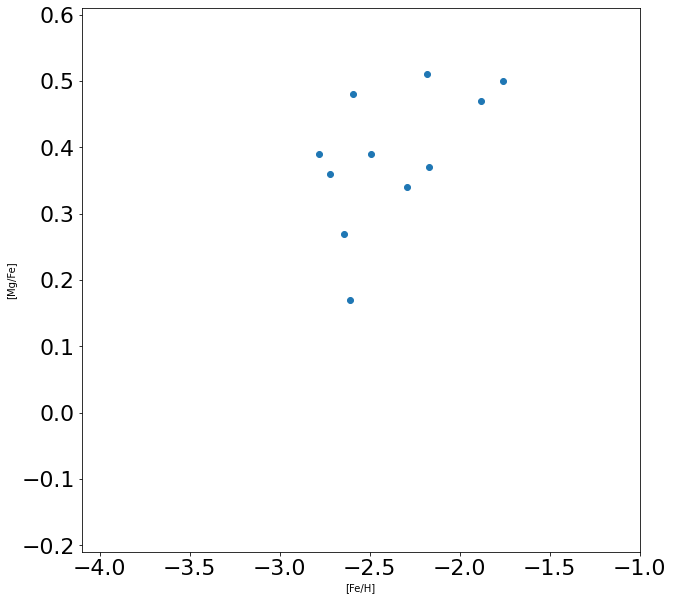

In [16]:
# Try to plot [Mg/Fe]
mgfe_all = []
feh_all = []
for i in range(len(smss_list)):
    mgfe_ind = np.where(abund_data[i]['species'] == 12.)[0][0]
    feh_ind = np.where(abund_data[i]['species'] == 26.)[0][0]
    mgfe_temp = abund_data[i].loc[mgfe_ind,'[X/Fe]']
    feh_temp = abund_data[i].loc[feh_ind,'[X/H]']
    mgfe_all.append(mgfe_temp)
    feh_all.append(feh_temp)
    
plt.figure(figsize=[10,10])
plt.scatter(feh_all,mgfe_all)
plt.xlim([-4.1,-1])
plt.ylim([-0.21,0.61])
plt.xlabel('[Fe/H]')
plt.ylabel('[Mg/Fe]')
plt.show()

In [70]:
print(feh_all,abund_name)
print(orb_df['name'])

[-1.88, -2.18, -2.72, -2.29, -2.78, -1.76, -2.17, -2.49, -2.64, -2.61, -2.59] ['smss709', 'smss1_12', 'smss338', 'smss1_09', 'smss712', 'smss1_29', 'smss1_18', 'smss697', 'smss343', 'smss710', 'smss1_33']
0      'SMSS709'
1     'SMSS1_12'
2      'SMSS338'
3     'SMSS1_09'
4      'SMSS712'
5     'SMSS1_29'
6     'SMSS1_18'
7      'SMSS697'
8      'SMSS343'
9      'SMSS710'
10    'SMSS1_33'
Name: name, dtype: object


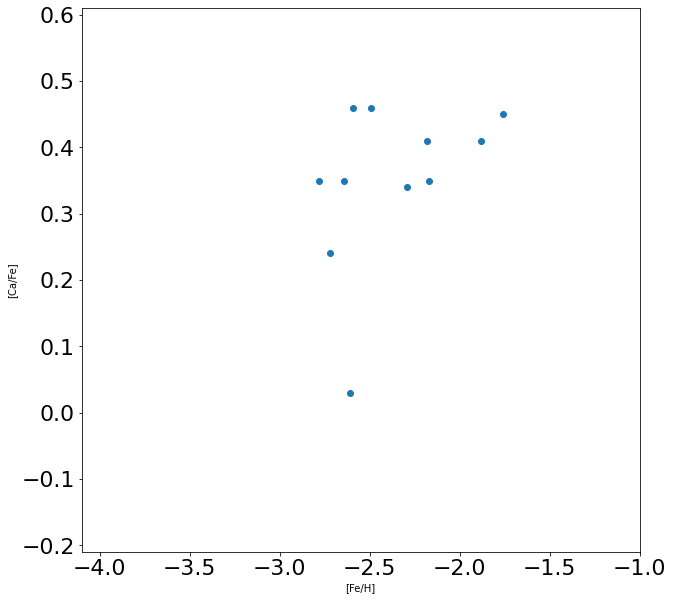

In [18]:
# Try to plot [Ca/Fe]
cafe_all = []
feh_all = []
for i in range(len(smss_list)):
    cafe_ind = np.where(abund_data[i]['species'] == 20.)[0][0]
    feh_ind = np.where(abund_data[i]['species'] == 26.)[0][0]
    cafe_temp = abund_data[i].loc[cafe_ind,'[X/Fe]']
    feh_temp = abund_data[i].loc[feh_ind,'[X/H]']
    cafe_all.append(cafe_temp)
    feh_all.append(feh_temp)
    
plt.figure(figsize=[10,10])
plt.scatter(feh_all,cafe_all)
plt.xlim([-4.1,-1])
plt.ylim([-0.21,0.61])
plt.xlabel('[Fe/H]')
plt.ylabel('[Ca/Fe]')
plt.show()

In [6]:
# Try to plot [Si/Fe]
sife_all = []
for i in range(len(smss_list)):
    sife_ind = np.where(abund_data[i]['species'] == 14.)[0][0]
    sife_temp = abund_data[i].loc[sife_ind,'[X/Fe]']
    sife_all.append(sife_temp)
    
plt.figure(figsize=[10,10])
plt.scatter(feh_all,sife_all)
plt.xlim([-4.1,-1])
plt.ylim([-0.21,0.61])
plt.xlabel('[Fe/H]')
plt.ylabel('[Si/Fe]')
plt.show()

IndexError: index 0 is out of bounds for axis 0 with size 0

In [53]:
# Create color bar based on the Lz of the stars # Not quite working for now because of the RPA stars
color_list = ['b']*len(abund_name)
for i in range(len(color_list)):
    if orb_df['Orthogonal_angular_momentum_lz'][i] < 1000 and orb_df['Orthogonal_angular_momentum_lz'][i] > 500:
        color_list[i] = 'm'  
    elif orb_df['Orthogonal_angular_momentum_lz'][i] < 500:
        color_list[i] = 'c'
        
color_list = np.array(color_list)

In [54]:
print(color_list)

['b' 'm' 'c' 'm' 'b' 'b' 'm' 'b' 'm' 'm' 'b']


In [193]:
abund_data_line[0].columns

Index(['index', 'wavelength', 'species', 'expot', 'loggf', 'logeps', 'e_stat',
       'eqw', 'e_eqw', 'fwhm', 'e_Teff', 'e_logg', 'e_vt', 'e_MH', 'e_sys',
       'e_tot', 'weight'],
      dtype='object')

In [12]:
# Write a standard function to extract abundances for any given abundances atomic numbers
def get_abund(abund_elem,eu_ul_names=[],eu_ul_vals=[],include_fe=True,specific_list=None):
    all_elem = [ [] for _ in range(len(abund_elem)) ]
    all_elem_std = [ [] for _ in range(len(abund_elem)) ]
    feh_all = []
    feh_all_std_err = []
    feh_all_std_sig = []
    if specific_list==None:
        for j in range(len(abund_elem)):
            for i in range(len(smss_list)):
                try:
                    elem_ind = np.where(abund_data[i]['species'] == abund_elem[j])[0][0]
                    elem_temp = abund_data[i].loc[elem_ind,'[X/Fe]']
                    elem_std_temp = abund_data[i].loc[elem_ind,'e_XFe']
                    all_elem[j].append(elem_temp)
                    all_elem_std[j].append(elem_std_temp)
                except IndexError:
                    all_elem[j].append(np.nan)
                    all_elem_std[j].append(np.nan)
        if include_fe:
            for i in range(len(smss_list)):
                feh_ind = np.where(abund_data[i]['species'] == 26.)[0][0]
                feh_temp = abund_data[i].loc[feh_ind,'[X/H]']
                feh_std_err_temp = abund_data[i].loc[feh_ind,'e_XH']
                feh_std_sig_temp = abund_data[i].loc[feh_ind,'sigma_w']
                feh_all.append(feh_temp)
                feh_all_std_err.append(feh_std_err_temp)
                feh_all_std_sig.append(feh_std_sig_temp)
    else:
        for j in range(len(abund_elem)):
            for i in range(len(specific_list)):
                try:
                    elem_ind = np.where(abund_data[specific_list[i]]['species'] == abund_elem[j])[0][0]
                    elem_temp = abund_data[specific_list[i]].loc[elem_ind,'[X/Fe]']
                    elem_std_temp = abund_data[i].loc[elem_ind,'e_XFe']
                    all_elem[j].append(elem_temp)
                    all_elem_std[j].append(elem_std_temp)
                except IndexError:
                    all_elem[j].append(np.nan)
                    all_elem_std[j].append(np.nan)
        if include_fe:
            for i in range(len(specific_list)):
                feh_ind = np.where(abund_data[specific_list[i]]['species'] == 26.)[0][0]
                feh_temp = abund_data[specific_list[i]].loc[feh_ind,'[X/H]']
                feh_std_err_temp = abund_data[i].loc[feh_ind,'e_XH']
                feh_std_sig_temp = abund_data[i].loc[feh_ind,'sigma_w']
                feh_all.append(feh_temp)
                feh_all_std_err.append(feh_std_err_temp)
                feh_all_std_sig.append(feh_std_sig_temp)
                
    
    return np.array(all_elem), np.array(feh_all), np.array(all_elem_std), np.array(feh_all_std_err), np.array(feh_all_std_sig)

def apply_corr(star_name,elem_no_corr,corr_elem,corr_list,line_wise=[],lines_data=[]):
    assert len(star_name) == len(elem_no_corr[0])
    
    # Check that if the correction needs to be applied line-by-line
    if len(line_wise) != 0:
        assert (len(star_name) == len(lines_data)) and (len(corr_list) == len(line_wise))
    else:
        line_wise = [False]*len(star_name)
    
    res = elem_no_corr.copy()
    # Apply the corrections for a given element not line-wise
    for i in range(len(corr_elem)):
        # Check to see if this elements ask for line-wise correction
        if line_wise[i] == True:
            continue
        # Search the abundances indices
        try:
            ii_elem = np.where(np.array(abund_elem) == corr_elem[i])[0][0]
        except:
            print('Failed search for element',corr_elem[i])
        corr_df = corr_list[i]
        
        # Apply the correction to stars
        for j in range(len(star_name)):
            ii_star = np.where(corr_df['Name'] == star_name[j].upper())[0][0]
            print(ii_elem,ii_star)
            res[ii_elem,j] = elem_no_corr[ii_elem,j]+corr_df.loc[ii_star,'delt']
    
    # Apply the corrections for a given element line-wise
    for i in range(len(corr_elem)):
        # Check to see if this elements ask for line-wise correction
        if line_wise[i] == False:
            continue
        for j in range(len(star_name)):
            corr_df = corr_list[i]
            line_df = lines_data[j]
            
            # Record the weights of individual lines (weighted mean is a linear combination so I don't need to apply
            # the correction to the specific log gf values, just need to find the weighted correction and apply it to
            # the final abundance)
            nlte_corr_weight = []
            nlte_corr_dN = []
            ii_star = np.where(corr_df['Name'] == star_name[j].upper())[0][0]
            # Determine the lines to be corrected and their weights
            for k in range(len(corr_df.columns)):
                if corr_df.columns[k][0:2] == 'dN':
                    line_wl = float(corr_df.columns[k][2:])
                    try:
                        ii_corr_line = np.where((line_df['species'] == corr_elem[i]) &
                                                (abs(line_df['wavelength']-line_wl) < 1))[0][0]
                    except:
                        print('Failed search for element',corr_elem[i], "with wavelength",line_wl)
                        continue
                    corr_weight = line_df['weight'][ii_corr_line]
                    nlte_corr_weight.append(corr_weight)
                    # check to make sure there is a sensible correction
                    if corr_df[corr_df.columns[k]][ii_star] < 10:
                        nlte_corr_dN.append(corr_df[corr_df.columns[k]][ii_star])
                    else:
                        nlte_corr_dN.append(0.)
            
            nlte_corr_weight = np.array(nlte_corr_weight)
            nlte_corr_dN = np.array(nlte_corr_dN)
            nlte_corr = np.sum(nlte_corr_weight*nlte_corr_dN)/np.sum(nlte_corr_weight)
            
            ii_elem = np.where(np.array(abund_elem) == corr_elem[i])[0][0]
            print(ii_elem,ii_star)
            
            res[ii_elem,j] = elem_no_corr[ii_elem,j]+nlte_corr
            
        
    
    return res


def make_plots(N_row,N_col,all_elem,elem_labels,feh_disk=[],disk_elem=[],file_name=None):
    assert N_row*N_col >= len(all_elem)
    f, axs = plt.subplots(N_row,N_col,figsize=[N_col*10,N_row*10])
    
    for i in range(N_row):
        for j in range(N_col):
            if i*N_col+j >= len(all_elem):
                break
            axs[i,j].scatter(feh_all,all_elem[i*N_col+j],s=100)
            if feh_disk!=[]:
                axs[i,j].scatter(feh_disk,disk_elem[i*N_col+j],marker='*',c='r',s=100)    
            axs[i,j].set_xlim([-4.1,-1])
            axs[i,j].set_ylim([-1.21,0.66])
            axs[i,j].axhline(0,ls='--')
            axs[i,j].set_xlabel('[Fe/H]')
            axs[i,j].set_ylabel(elem_labels[i*N_col+j])
    plt.show()
    
    if file_name != None:
        f.savefig(file_name,bbox_inches='tight')

def make_plots_errorbar(N_row,N_col,all_elem,all_elem_std,elem_labels,elem_range=[],feh_disk=[],disk_elem=[],
                        xlim=[-4.1,-0.2],ylim=[-1.21,0.66],add_lit=True,file_name=None,lz_color=False,bnb_errorbar=True,
                        nlte_diff=False):
    # Check the range of elements to plot
    if len(elem_range) != 0:
        pass
    else:
        elem_range = np.arange(len(all_elem))
    
    assert N_row*N_col >= len(elem_range)
    
    f, axs = plt.subplots(N_row,N_col,figsize=[N_col*10,N_row*10])
    
    for i in range(N_row):
        for j in range(N_col):
            try:
                N_plot = elem_range[i*N_col+j]
            except IndexError:
                break
            ind_tmp = list(range(len(smss_list)))
            if (abund_elem[N_plot] == 63.1):
                for k in (smss_mwtd_eu_ul_ind):
                    ind_tmp.remove(k)
            if lz_color:
                axs[i,j].errorbar(feh_all[ind_tmp],all_elem[N_plot][ind_tmp],
                                  xerr=feh_all_std[ind_tmp],yerr=all_elem_std[N_plot][ind_tmp],
                                  markersize=0,linestyle='none',marker='.',c='b',zorder=2)
                if (abund_elem[N_plot] == 63.1):
                    axs[i,j].scatter(feh_all[smss_mwtd_eu_ul_ind],all_elem[N_plot][smss_mwtd_eu_ul_ind],s=400,marker='v',c=color_list[smss_mwtd_eu_ul_ind],label='My sample',zorder=4)
                axs[i,j].scatter(feh_all[ind_tmp],all_elem[N_plot][ind_tmp],s=400,marker='.',c=color_list[ind_tmp],label='My sample',zorder=3)
                
            else:
                axs[i,j].errorbar(feh_all[ind_tmp],all_elem[N_plot][ind_tmp],
                                  xerr=feh_all_std[ind_tmp],yerr=all_elem_std[N_plot][ind_tmp],
                                  markersize=0,linestyle='none',marker='.',c='b',zorder=2)
                if (abund_elem[N_plot] == 63.1):
                    axs[i,j].scatter(feh_all[smss_mwtd_eu_ul_ind],all_elem[N_plot][smss_mwtd_eu_ul_ind],s=400,marker='v',c='b',label='My sample',zorder=4)
                axs[i,j].scatter(feh_all[ind_tmp],all_elem[N_plot][ind_tmp],s=400,marker='.',c='b',label='My sample',zorder=3)
            
            # Add in NLTE correction separately from different lines
            if (abund_elem[N_plot] in corr_elem) and (nlte_diff == True):
                ii_elem = np.where(np.array(corr_elem) == abund_elem[N_plot])[0][0]
                corr_df = corr_list[ii_elem]
                # Set some arbitrarily long enough flags for deciding if I need to annotate a new correction line
                # as well as a color list
                flag_anno = np.zeros(10)
                nlte_diff_c = plt.cm.get_cmap('hsv',10)
                # Loop over the stars to plot their corrections
                for k in ind_tmp:
                    ii_star = np.where(corr_df['Name'] == abund_name[k].upper())[0][0]
                    
                    # check to see if the correcting element is C
                    if abund_elem[N_plot] == 106.0:
                        nlte_corr_dN = corr_df['delt'][ii_star]
                        axs[i,j].scatter(feh_all[k],all_elem[N_plot][k]+nlte_corr_dN,
                                         s=400,marker='.',edgecolors=nlte_diff_c(0),facecolors='none',zorder=3)
                        axs[i,j].vlines(x=feh_all[k],ymin=all_elem[N_plot][k],ymax=all_elem[N_plot][k]+nlte_corr_dN,linestyles='--')
                    else:
                        # Determine the lines to be corrected for elements other than C
                        for l in range(len(corr_df.columns)):
                            if corr_df.columns[l][0:2] == 'dN':
                                line_wl = float(corr_df.columns[l][2:])
                                # check to make sure there is a sensible correction
                                if corr_df[corr_df.columns[l]][ii_star] < 10:
                                    nlte_corr_dN = corr_df[corr_df.columns[l]][ii_star]
                                    axs[i,j].scatter(feh_all[k],all_elem[N_plot][k]+nlte_corr_dN,
                                                     s=400,marker='.',edgecolors=nlte_diff_c(l),facecolors='none',zorder=3)
                                    axs[i,j].vlines(x=feh_all[k],ymin=all_elem[N_plot][k],ymax=all_elem[N_plot][k]+nlte_corr_dN,linestyles='--')
                                    if flag_anno[l] == 0:
                                        axs[i,j].annotate(str(line_wl),(feh_all[k],all_elem[N_plot][k]+nlte_corr_dN),size=16)
                                        flag_anno[l] = 1
                                else:
                                    nlte_corr_dN = np.nan
                                
                
                
#                 axs[i,j].errorbar(feh_all,all_elem[N_plot],xerr=feh_all_std,yerr=all_elem_std[N_plot],
#                                   markersize=25,linestyle='none',marker='.',c='b',label='My sample',zorder=3)
            # Plot RPA stars as green dots
            axs[i,j].errorbar(feh_all[ind_rpa],all_elem[N_plot][ind_rpa],
                              xerr=feh_all_std[ind_rpa],yerr=all_elem_std[N_plot][ind_rpa],
                              markersize=0,linestyle='none',marker='.',c='g',zorder=2)
            axs[i,j].scatter(feh_all[ind_rpa],all_elem[N_plot][ind_rpa],s=400,marker='.',c='g',label='My sample',zorder=4)
                
#             axs[i,j].axvline(-1.8,lw=5)
            
            # Plot the smss710 as green star
#             axs[i,j].errorbar(feh_all[-2],all_elem[N_plot][-2],xerr=feh_all_std[-2],yerr=all_elem_std[N_plot][-2],
#                               markersize=20,linestyle='none',marker='*',c='g',zorder=5)
            
            # Plot the smss1_18, 1_29, 1_33 as red large dots
#             axs[i,j].errorbar(feh_all[[5,6,10]],all_elem[N_plot][[5,6,10]],xerr=feh_all_std[[5,6,10]],yerr=all_elem_std[N_plot][[5,6,10]],
#                               markersize=50,linestyle='none',marker='.',c='r',zorder=5)
            
            if feh_disk!=[]:
                axs[i,j].scatter(feh_disk,disk_elem[N_plot],marker='*',c='r',s=20)
            if add_lit == True:
                # Add in Bensby 2005 (Superseded by 2014-2016 results)
#                 try: 
#                     axs[i,j].errorbar(bensby2005_td['[Fe/H]I'],bensby2005_td[b05_xh_names[N_plot]]-bensby2005_td['[Fe/H]I'],xerr=bensby2005_td['s[Fe/H]I'],yerr=np.sqrt(bensby2005_td[b05_sxh_names[N_plot]]**2+bensby2005_td['s[Fe/H]I']**2),
#                                       markersize=10,linestyle='none',marker='^',c='b',label='B05 TD',zorder=1)
#                 except KeyError:
#                     try:
#                         axs[i,j].scatter(bensby2005_td['[Fe/H]I'],bensby2005_td[b05_xh_names[N_plot]]-bensby2005_td['[Fe/H]I'],
#                                         s=50,marker='^',c='b',zorder=1)
#                     except KeyError:
#                         pass
                
                # Add in Bensby & Battistin 2014-2016
                try: 
                    if bnb_errorbar == False:
                        # If we don't want the Bensby error bars, force the KeyError and do scatter plots
                        raise KeyError
                    if bnb_xh_names[N_plot][-2:] == 'Fe':
                        axs[i,j].errorbar(bnb2014_td['Fe/H'],bnb2014_td[bnb_xh_names[N_plot]],xerr=bnb2014_td['e_Fe/H'],yerr=bnb2014_td[bnb_sxh_names[N_plot]],
                                          markersize=10,linestyle='none',marker='^',c='c',mec='k',label='B14-16 TD',zorder=1)
                    else:
                        axs[i,j].errorbar(bnb2014_td['Fe/H'],bnb2014_td[bnb_xh_names[N_plot]]-bnb2014_td['Fe/H'],xerr=bnb2014_td['e_Fe/H'],yerr=np.sqrt(bnb2014_td[bnb_sxh_names[N_plot]]**2+bnb2014_td['e_Fe/H']**2),
                                          markersize=10,linestyle='none',marker='^',c='c',mec='k',label='B14-16 TD',zorder=1)
                except KeyError:
                    try:
                        if bnb_xh_names[N_plot][-2:] == 'Fe':
                            axs[i,j].scatter(bnb2014_td['Fe/H'],bnb2014_td[bnb_xh_names[N_plot]],
                                             s=50,marker='^',c='c',ec='k',zorder=1)
                        else:
                            axs[i,j].scatter(bnb2014_td['Fe/H'],bnb2014_td[bnb_xh_names[N_plot]]-bnb2014_td['Fe/H'],
                                             s=50,marker='^',c='c',ec='k',zorder=1)
                    except KeyError:
                        pass
                
                # Add in Yong 2013
                try:
                    if (y13_xfe_names[N_plot] in y13_xfe_ul_names):
                        # Ignore upper limits
#                         for k in np.where(yong2013_halo['l_'+y13_xfe_names[N_plot]] == '<'):
#                             axs[i,j].scatter(yong2013_halo['Fe/H'][k],yong2013_halo[y13_xfe_names[N_plot]][k],
#                                      marker='v',c='r',s=20,label='Y13 UL',zorder=0)
                        for k in np.where(yong2013_halo['l_'+y13_xfe_names[N_plot]] != '<'):
                            axs[i,j].scatter(yong2013_halo['Fe/H'][k],yong2013_halo[y13_xfe_names[N_plot]][k],
                                     marker='s',c='orange',s=20,label='Y13 Halo',zorder=0)
                    else:
                        if y13_xfe_names[N_plot] == 'FeII':
                            axs[i,j].scatter(yong2013_halo['Fe/H'],yong2013_halo[y13_xfe_names[N_plot]]-yong2013_halo['Fe/H'],
                                         marker='s',c='orange',s=20,label='Y13 Halo',zorder=0)
                        else:
                            axs[i,j].scatter(yong2013_halo['Fe/H'],yong2013_halo[y13_xfe_names[N_plot]],
                                             marker='s',c='orange',s=20,label='Y13 Halo',zorder=0)
                except KeyError:
                    pass
                
                # Add in Nissen 2014
                # Make separate legend points
                axs[i,j].scatter(-10,-10,s=50,marker='^',c='y',label='N14 TD')
                try: 
                    if n14_xh_names[N_plot][-2:] == 'Fe':
                        axs[i,j].errorbar(nissen2014_td['[Fe/H]'],nissen2014_td[n14_xh_names[N_plot]],xerr=nissen2014_td['e_[Fe/H]'],yerr=nissen2014_td[n14_sxh_names[N_plot]],
                                          markersize=10,linestyle='none',marker='^',c='y',zorder=1)
                    else:
                        axs[i,j].errorbar(nissen2014_td['[Fe/H]'],nissen2014_td[n14_xh_names[N_plot]]-nissen2014_td['[Fe/H]'],xerr=nissen2014_td['e_[Fe/H]'],yerr=np.sqrt(nissen2014_td[n14_sxh_names[N_plot]]**2+nissen2014_td['e_[Fe/H]']**2),
                                          markersize=10,linestyle='none',marker='^',c='y',zorder=1)
                except KeyError:
                    try:
                        if n14_xh_names[N_plot][-2:] == 'Fe':
                            axs[i,j].scatter(nissen2014_td['[Fe/H]'],nissen2014_td[n14_xh_names[N_plot]],
                                             s=50,marker='^',c='y',zorder=1)
                        else:
                            axs[i,j].scatter(nissen2014_td['[Fe/H]'],nissen2014_td[n14_xh_names[N_plot]]-nissen2014_td['[Fe/H]'],
                                             s=50,marker='^',c='y',zorder=1)
                    except KeyError:
                        pass
                
                # Add in Sestitio 2019
                # Make separate legend points
                axs[i,j].scatter(-10,-10,s=50,marker='o',c='k',label='S19 MWTD',zorder=1)
                axs[i,j].scatter(-10,-10,s=100,marker='o',c='y',label='S19 TD',zorder=1)
                
                try:
                    for k in range(len(sestito2019_all)):
                        if k == 10:
                            c_s19 = 'y'
                            s_s19 = 100
                        else:
                            c_s19 = 'k'
                            s_s19 = 50
                        # Test if this is an upper limit
                        try: # If the conversion from string to float failed, then it means there must be a < sign
                            axs[i,j].scatter(float(sestito2019_all['Fe/H'][k]),float(sestito2019_all[s19_xh_names[N_plot]][k])-float(sestito2019_all['Fe/H'][k]),
                                             s=s_s19,marker='o',c=c_s19,zorder=1)
                        except ValueError:
                            axs[i,j].scatter(float(sestito2019_all['Fe/H'][k]),float(sestito2019_all[s19_xh_names[N_plot]][k][1:])-float(sestito2019_all['Fe/H'][k]),
                                             s=s_s19,marker='v',c=c_s19,zorder=1)
                            continue
#                         if np.isnan(float(sestito2019_all[s19_xh_names[N_plot]][k])) == False:
#                             if sestito2019_all[s19_xh_names[N_plot]][k].startswith('<'):
#                                 axs[i,j].scatter(float(sestito2019_all['Fe/H'][k]),float(sestito2019_all[s19_xh_names[N_plot]][k])-float(sestito2019_all['Fe/H'][k]),
#                                                  s=50,marker='v',c=c_s19,zorder=1)
#                             else:
#                                 axs[i,j].scatter(float(sestito2019_all['Fe/H'][k]),float(sestito2019_all[s19_xh_names[N_plot]][k])-float(sestito2019_all['Fe/H'][k]),
#                                                  s=50,marker='o',c=c_s19,zorder=1)
                except KeyError:
                    pass
        
                # Add in Sakari 2018
                # Make separate legend points
                axs[i,j].scatter(-10,-10,s=20,marker='^',c='orange',label='S18 RPA',zorder=1)
                
                try:
                    for k in range(len(sakari2018_all)):
                        # Test if this is an upper limit
                        try: # If the conversion from string to float failed, then it means there must be an upper limit or no measurement; just ignore the star in that case
                            axs[i,j].scatter(float(sakari2018_all['[FeI/H]'][k]),float(sakari2018_all[s18_xh_names[N_plot]][k]),
                                             s=20,marker='^',c='orange',zorder=1)
                        except ValueError:
                            continue
                except KeyError:
                    pass
        
                # Add in Barklem 2005
                # Make separate legend points
                axs[i,j].scatter(-10,-10,s=20,marker='d',c='orange',label='B05 Halo',zorder=0)
                
                try:
                    for k in range(len(barklem2005_halo)):
                        # Test if this is an upper limit
                        try: # If the conversion from string to float failed, then it means there must be a < sign
                            # Check if [Eu/Fe] is between 0.0 and 0.5
                            if ((float(barklem2005_halo['Eu/H'][k]) - float(barklem2005_halo['Fe/H'][k])) > 0.0) \
                            and ((float(barklem2005_halo['Eu/H'][k]) - float(barklem2005_halo['Fe/H'][k])) < 0.5):
                                axs[i,j].scatter(float(barklem2005_halo['Fe/H'][k]),float(barklem2005_halo[bk05_xh_names[N_plot]][k])-float(barklem2005_halo['Fe/H'][k]),
                                                 s=20,marker='d',c='orange',zorder=0)
                            
                        except ValueError:
#                             axs[i,j].scatter(float(sestito2019_all['Fe/H'][k]),float(sestito2019_all[s19_xh_names[N_plot]][k][1:])-float(sestito2019_all['Fe/H'][k]),
#                                              s=20,marker='v',c='y',zorder=0)
                            continue
#                         if np.isnan(float(sestito2019_all[s19_xh_names[N_plot]][k])) == False:
#                             if sestito2019_all[s19_xh_names[N_plot]][k].startswith('<'):
#                                 axs[i,j].scatter(float(sestito2019_all['Fe/H'][k]),float(sestito2019_all[s19_xh_names[N_plot]][k])-float(sestito2019_all['Fe/H'][k]),
#                                                  s=50,marker='v',c=c_s19,zorder=1)
#                             else:
#                                 axs[i,j].scatter(float(sestito2019_all['Fe/H'][k]),float(sestito2019_all[s19_xh_names[N_plot]][k])-float(sestito2019_all['Fe/H'][k]),
#                                                  s=50,marker='o',c=c_s19,zorder=1)
                except KeyError:
                    pass
                
                # Add in Cayrel 2004
                # Make separate legend points
                axs[i,j].scatter(-10,-10,s=20,marker='s',c='g',label='C04 Halo',zorder=0)
                
                try:
                    for k in range(len(cayrel2004_halo)):
                        # Test if this is an upper limit
                        try: # If the conversion from string to float failed, then it means there must be a < sign
                            # Check if the current element is Zn
                            if (abund_elem[N_plot] == 30.0):
                                axs[i,j].scatter(float(cayrel2004_halo['Fe/H'][k]),float(cayrel2004_halo[c04_xh_names[N_plot]][k])-float(cayrel2004_halo['Fe/H'][k]),
                                                 s=20,marker='s',c='g',zorder=0)
                            
                        except ValueError:
#                             axs[i,j].scatter(float(sestito2019_all['Fe/H'][k]),float(sestito2019_all[s19_xh_names[N_plot]][k][1:])-float(sestito2019_all['Fe/H'][k]),
#                                              s=20,marker='v',c='y',zorder=0)
                            continue
#                         if np.isnan(float(sestito2019_all[s19_xh_names[N_plot]][k])) == False:
#                             if sestito2019_all[s19_xh_names[N_plot]][k].startswith('<'):
#                                 axs[i,j].scatter(float(sestito2019_all['Fe/H'][k]),float(sestito2019_all[s19_xh_names[N_plot]][k])-float(sestito2019_all['Fe/H'][k]),
#                                                  s=50,marker='v',c=c_s19,zorder=1)
#                             else:
#                                 axs[i,j].scatter(float(sestito2019_all['Fe/H'][k]),float(sestito2019_all[s19_xh_names[N_plot]][k])-float(sestito2019_all['Fe/H'][k]),
#                                                  s=50,marker='o',c=c_s19,zorder=1)
                except KeyError:
                    pass
                
                # Add in APOGEE
                # Make separate legend points
#                 axs[i,j].scatter(-10,-10,s=10,marker='.',c='r',label='APOGEE Halo')
#                 try: 
#                     axs[i,j].scatter(apogee_halo['fe_h'],apogee_halo[apogee_xfe_names[N_plot]],
#                                      s=10,marker='.',c='r',zorder=0,alpha=0.5)
#                 except KeyError:
#                     pass
                
#                 # Make separate legend points
#                 axs[i,j].scatter(-10,-10,s=10,marker='.',c='b',label='APOGEE MWTD')
#                 try: 
#                     axs[i,j].scatter(apogee_mwtd['fe_h'],apogee_mwtd[apogee_xfe_names[N_plot]],
#                                      s=10,marker='.',c='b',zorder=0,alpha=1)
#                 except KeyError:
#                     pass
            
            
                if i+j == 0:
                    axs[i,j].legend(fontsize=12)
            axs[i,j].set_xlim(xlim)
            if elem_labels[N_plot] == '[Sr II/Fe]' or elem_labels[N_plot] == '[Ba II/Fe]':
                axs[i,j].set_ylim([ylim[0]-1,ylim[1]])
            elif elem_labels[N_plot] == '[Nd II/Fe]' or elem_labels[N_plot] == '[Sm II/Fe]':
                axs[i,j].set_ylim([ylim[0],ylim[1]+1])
            elif elem_labels[N_plot] == '[Na I/Fe]':
                axs[i,j].set_ylim([ylim[0],ylim[1]+1.5])
            else:
                axs[i,j].set_ylim(ylim)
            axs[i,j].axhline(0,ls='--')
            axs[i,j].set_xlabel('[Fe/H]')
            axs[i,j].set_ylabel(elem_labels[N_plot])
    plt.show()
    
    if file_name != None:
        f.savefig(file_name,bbox_inches='tight')

In [9]:
def make_plots_errorbar_xh(N_row,N_col,all_elem,all_elem_std,elem_labels,elem_range=[],feh_disk=[],disk_elem=[],line_b_list=None,
                        xlim=[-4.1,-0.2],ylim=[-1.21,0.66],add_lit=True,file_name=None,lz_color=False):
    
    # Check the range of elements to plot
    if len(elem_range) != 0:
        pass
    else:
        elem_range = np.arange(len(all_elem))
    
    assert N_row*N_col >= len(elem_range)
    
    f, axs = plt.subplots(N_row,N_col,figsize=[N_col*10,N_row*10])
    
    for i in range(N_row):
        for j in range(N_col):
            try:
                N_plot = elem_range[i*N_col+j]
            except IndexError:
                break
            ind_tmp = list(range(len(smss_list)))
            if (abund_elem[N_plot] == 63.1):
                for k in (smss_mwtd_eu_ul_ind):
                    ind_tmp.remove(k)
            if lz_color:
                axs[i,j].errorbar(feh_all[ind_tmp],all_elem[N_plot][ind_tmp]+feh_all[ind_tmp],
                                  xerr=feh_all_std[ind_tmp],yerr=np.sqrt(all_elem_std[N_plot][ind_tmp]**2+feh_all_std[ind_tmp]**2),
                                  markersize=0,linestyle='none',marker='.',c='b',zorder=2)
                if (abund_elem[N_plot] == 63.1):
                    axs[i,j].scatter(feh_all[smss_mwtd_eu_ul_ind],all_elem[N_plot][smss_mwtd_eu_ul_ind]+feh_all[smss_mwtd_eu_ul_ind],
                                     s=400,marker='v',c=color_list[smss_mwtd_eu_ul_ind],label='My sample',zorder=4)
                axs[i,j].scatter(feh_all[ind_tmp],all_elem[N_plot][ind_tmp]+feh_all[ind_tmp],s=400,marker='.',c=color_list[ind_tmp],label='My sample',zorder=3)
            else:
                axs[i,j].errorbar(feh_all[ind_tmp],all_elem[N_plot][ind_tmp]+feh_all[ind_tmp],
                                  xerr=feh_all_std[ind_tmp],yerr=np.sqrt(all_elem_std[N_plot][ind_tmp]**2+feh_all_std[ind_tmp]**2),
                                  markersize=0,linestyle='none',marker='.',c='b',zorder=2)
                if (abund_elem[N_plot] == 63.1):
                    axs[i,j].scatter(feh_all[smss_mwtd_eu_ul_ind],all_elem[N_plot][smss_mwtd_eu_ul_ind]+feh_all[smss_mwtd_eu_ul_ind],
                                     s=400,marker='v',c='b',label='My sample',zorder=4)
                axs[i,j].scatter(feh_all[ind_tmp],all_elem[N_plot][ind_tmp]+feh_all[ind_tmp],s=400,marker='.',c='b',label='My sample',zorder=3)
                
            # Plot an one-on-one line if the intercept list is not None
            if line_b_list != None:
                axs[i,j].plot([-10,10],[-10+line_b_list[i*N_col+j],10+line_b_list[i*N_col+j]],ls='--',c='r',zorder=10)
                
            # Plot the RPA stars as green dots
            axs[i,j].errorbar(feh_all[ind_rpa],all_elem[N_plot][ind_rpa]+feh_all[ind_rpa],
                              xerr=feh_all_std[ind_rpa],yerr=np.sqrt(all_elem_std[N_plot][ind_rpa]**2+feh_all_std[ind_rpa]**2),
                              markersize=0,linestyle='none',marker='.',c='g',zorder=2)
            axs[i,j].scatter(feh_all[ind_rpa],all_elem[N_plot][ind_rpa]+feh_all[ind_rpa],s=400,marker='.',c='g',label='RPA sample',zorder=4)
                
            
            # Plot the smss710 as green star
#             axs[i,j].errorbar(feh_all[-2],all_elem[N_plot][-2]+feh_all[-2],
#                               xerr=feh_all_std[-2],yerr=np.sqrt(all_elem_std[N_plot][-2]**2+feh_all_std[-2]**2),
#                               markersize=20,linestyle='none',marker='*',c='g',zorder=5)
            
            # Plot the smss1_18, 1_29, 1_33 as red large dots
#             axs[i,j].errorbar(feh_all[[5,6,10]],all_elem[N_plot][[5,6,10]]+feh_all[[5,6,10]],
#                               xerr=feh_all_std[[5,6,10]],yerr=all_elem_std[N_plot][[5,6,10]],
#                               markersize=50,linestyle='none',marker='.',c='r',zorder=5)
            
            if feh_disk!=[]:
                axs[i,j].scatter(feh_disk,disk_elem[N_plot]+feh_disk,marker='*',c='r',s=20)
            if add_lit == True:
                # Add in Bensby & Battistin 2014-2016
                try: 
                    if bnb_xh_names[N_plot][-2:] == 'Fe':
                        axs[i,j].errorbar(bnb2014_td['Fe/H'],bnb2014_td[bnb_xh_names[N_plot]]+bnb2014_td['Fe/H'],
                                          xerr=bnb2014_td['e_Fe/H'],yerr=np.sqrt(bnb2014_td[bnb_sxh_names[N_plot]]**2+bnb2014_td['e_Fe/H']**2),
                                          markersize=10,linestyle='none',marker='^',c='c',mec='k',label='B14-16 TD',zorder=1)
                    else:
                        axs[i,j].errorbar(bnb2014_td['Fe/H'],bnb2014_td[bnb_xh_names[N_plot]],xerr=bnb2014_td['e_Fe/H'],yerr=bnb2014_td[bnb_sxh_names[N_plot]],
                                          markersize=10,linestyle='none',marker='^',c='c',mec='k',label='B14-16 TD',zorder=1)
                except KeyError:
                    try:
                        if bnb_xh_names[N_plot][-2:] == 'Fe':
                            axs[i,j].scatter(bnb2014_td['Fe/H'],bnb2014_td[bnb_xh_names[N_plot]]+bnb2014_td['Fe/H'],
                                             s=50,marker='^',c='c',ec='k',zorder=1)
                        else:
                            axs[i,j].scatter(bnb2014_td['Fe/H'],bnb2014_td[bnb_xh_names[N_plot]],
                                             s=50,marker='^',c='c',ec='k',zorder=1)
                    except KeyError:
                        pass
                
                # Add in Yong 2013
                try:
                    if (y13_xfe_names[N_plot] in y13_xfe_ul_names):
                        # Ignore upper limits
#                         for k in np.where(yong2013_halo['l_'+y13_xfe_names[N_plot]] == '<'):
#                             axs[i,j].scatter(yong2013_halo['Fe/H'][k],yong2013_halo[y13_xfe_names[N_plot]][k],
#                                      marker='v',c='r',s=20,label='Y13 UL',zorder=0)
                        for k in np.where(yong2013_halo['l_'+y13_xfe_names[N_plot]] != '<'):
                            axs[i,j].scatter(yong2013_halo['Fe/H'][k],yong2013_halo[y13_xfe_names[N_plot]][k]+yong2013_halo['Fe/H'][k],
                                     marker='s',c='orange',s=20,label='Y13 Halo',zorder=0)
                    else:
                        if y13_xfe_names[N_plot] == 'FeII':
                            axs[i,j].scatter(yong2013_halo['Fe/H'],yong2013_halo[y13_xfe_names[N_plot]],
                                         marker='s',c='orange',s=20,label='Y13 Halo',zorder=0)
                        else:
                            axs[i,j].scatter(yong2013_halo['Fe/H'],yong2013_halo[y13_xfe_names[N_plot]]+yong2013_halo['Fe/H'],
                                             marker='s',c='orange',s=20,label='Y13 Halo',zorder=0)
                except KeyError:
                    pass
                
                # Add in Nissen 2014
                # Make separate legend points
                axs[i,j].scatter(-10,-10,s=50,marker='^',c='y',label='N14 TD')
                try: 
                    if n14_xh_names[N_plot][-2:] == 'Fe':
                        axs[i,j].errorbar(nissen2014_td['[Fe/H]'],nissen2014_td[n14_xh_names[N_plot]]+nissen2014_td['[Fe/H]'],
                                          xerr=nissen2014_td['e_[Fe/H]'],yerr=np.sqrt(nissen2014_td[n14_sxh_names[N_plot]]**2+nissen2014_td['e_[Fe/H]']**2),
                                          markersize=10,linestyle='none',marker='^',c='y',zorder=1)
                    else:
                        axs[i,j].errorbar(nissen2014_td['[Fe/H]'],nissen2014_td[n14_xh_names[N_plot]],
                                          xerr=nissen2014_td['e_[Fe/H]'],yerr=nissen2014_td[n14_sxh_names[N_plot]],
                                          markersize=10,linestyle='none',marker='^',c='y',zorder=1)
                except KeyError:
                    try:
                        if n14_xh_names[N_plot][-2:] == 'Fe':
                            axs[i,j].scatter(nissen2014_td['[Fe/H]'],nissen2014_td[n14_xh_names[N_plot]]+nissen2014_td['[Fe/H]'],
                                             s=50,marker='^',c='y',zorder=1)
                        else:
                            axs[i,j].scatter(nissen2014_td['[Fe/H]'],nissen2014_td[n14_xh_names[N_plot]],
                                             s=50,marker='^',c='y',zorder=1)
                    except KeyError:
                        pass
                
                # Add in Sestitio 2019
                # Make separate legend points
                axs[i,j].scatter(-10,-10,s=50,marker='o',c='k',label='S19 MWTD',zorder=1)
                axs[i,j].scatter(-10,-10,s=100,marker='o',c='y',label='S19 TD',zorder=1)
                
                try:
                    for k in range(len(sestito2019_all)):
                        if k == 10:
                            c_s19 = 'y'
                            s_s19 = 100
                        else:
                            c_s19 = 'k'
                            s_s19 = 50
                        # Test if this is an upper limit
                        try: # If the conversion from string to float failed, then it means there must be a < sign
                            axs[i,j].scatter(float(sestito2019_all['Fe/H'][k]),float(sestito2019_all[s19_xh_names[N_plot]][k]),
                                             s=s_s19,marker='o',c=c_s19,zorder=1)
                        except ValueError:
                            axs[i,j].scatter(float(sestito2019_all['Fe/H'][k]),float(sestito2019_all[s19_xh_names[N_plot]][k][1:]),
                                             s=s_s19,marker='v',c=c_s19,zorder=1)
                            continue
#                         if np.isnan(float(sestito2019_all[s19_xh_names[N_plot]][k])) == False:
#                             if sestito2019_all[s19_xh_names[N_plot]][k].startswith('<'):
#                                 axs[i,j].scatter(float(sestito2019_all['Fe/H'][k]),float(sestito2019_all[s19_xh_names[N_plot]][k])-float(sestito2019_all['Fe/H'][k]),
#                                                  s=50,marker='v',c=c_s19,zorder=1)
#                             else:
#                                 axs[i,j].scatter(float(sestito2019_all['Fe/H'][k]),float(sestito2019_all[s19_xh_names[N_plot]][k])-float(sestito2019_all['Fe/H'][k]),
#                                                  s=50,marker='o',c=c_s19,zorder=1)
                except KeyError:
                    pass
        
                # Add in Sakari 2018
                # Make separate legend points
                axs[i,j].scatter(-10,-10,s=20,marker='^',c='orange',label='S18 RPA',zorder=1)
                
                try:
                    for k in range(len(sakari2018_all)):
                        # Test if this is an upper limit
                        try: # If the conversion from string to float failed, then it means there must be an upper limit or no measurement; just ignore the star in that case
                            axs[i,j].scatter(float(sakari2018_all['[FeI/H]'][k]),float(sakari2018_all[s18_xh_names[N_plot]][k])+float(sakari2018_all['[FeI/H]'][k]),
                                             s=20,marker='^',c='orange',zorder=1)
                        except ValueError:
                            continue
                except KeyError:
                    pass
        
        
                # Add in Barklem 2005
                # Make separate legend points
                axs[i,j].scatter(-10,-10,s=20,marker='d',c='orange',label='B05 Halo',zorder=0)
                
                try:
                    for k in range(len(barklem2005_halo)):
                        # Test if this is an upper limit
                        try: # If the conversion from string to float failed, then it means there must be a < sign
                            # Check if [Eu/Fe] is between 0.0 and 0.5
                            if ((float(barklem2005_halo['Eu/H'][k]) - float(barklem2005_halo['Fe/H'][k])) > 0.0) \
                            and ((float(barklem2005_halo['Eu/H'][k]) - float(barklem2005_halo['Fe/H'][k])) < 0.5):
                                axs[i,j].scatter(float(barklem2005_halo['Fe/H'][k]),float(barklem2005_halo[bk05_xh_names[N_plot]][k]),
                                                 s=20,marker='d',c='orange',zorder=0)
                            
                        except ValueError:
#                             axs[i,j].scatter(float(sestito2019_all['Fe/H'][k]),float(sestito2019_all[s19_xh_names[N_plot]][k][1:])-float(sestito2019_all['Fe/H'][k]),
#                                              s=20,marker='v',c='y',zorder=0)
                            continue
#                         if np.isnan(float(sestito2019_all[s19_xh_names[N_plot]][k])) == False:
#                             if sestito2019_all[s19_xh_names[N_plot]][k].startswith('<'):
#                                 axs[i,j].scatter(float(sestito2019_all['Fe/H'][k]),float(sestito2019_all[s19_xh_names[N_plot]][k])-float(sestito2019_all['Fe/H'][k]),
#                                                  s=50,marker='v',c=c_s19,zorder=1)
#                             else:
#                                 axs[i,j].scatter(float(sestito2019_all['Fe/H'][k]),float(sestito2019_all[s19_xh_names[N_plot]][k])-float(sestito2019_all['Fe/H'][k]),
#                                                  s=50,marker='o',c=c_s19,zorder=1)
                except KeyError:
                    pass
        
                # Add in Cayrel 2004
                # Make separate legend points
                axs[i,j].scatter(-10,-10,s=20,marker='s',c='g',label='C04 Halo',zorder=0)
                
                try:
                    for k in range(len(cayrel2004_halo)):
                        # Test if this is an upper limit
                        try: # If the conversion from string to float failed, then it means there must be a < sign
                            # Check if the current element is Zn
                            if (abund_elem[N_plot] == 30.0):
                                axs[i,j].scatter(float(cayrel2004_halo['Fe/H'][k]),float(cayrel2004_halo[c04_xh_names[N_plot]][k]),
                                                 s=20,marker='s',c='g',zorder=0)
                            
                        except ValueError:
#                             axs[i,j].scatter(float(sestito2019_all['Fe/H'][k]),float(sestito2019_all[s19_xh_names[N_plot]][k][1:])-float(sestito2019_all['Fe/H'][k]),
#                                              s=20,marker='v',c='y',zorder=0)
                            continue
#                         if np.isnan(float(sestito2019_all[s19_xh_names[N_plot]][k])) == False:
#                             if sestito2019_all[s19_xh_names[N_plot]][k].startswith('<'):
#                                 axs[i,j].scatter(float(sestito2019_all['Fe/H'][k]),float(sestito2019_all[s19_xh_names[N_plot]][k])-float(sestito2019_all['Fe/H'][k]),
#                                                  s=50,marker='v',c=c_s19,zorder=1)
#                             else:
#                                 axs[i,j].scatter(float(sestito2019_all['Fe/H'][k]),float(sestito2019_all[s19_xh_names[N_plot]][k])-float(sestito2019_all['Fe/H'][k]),
#                                                  s=50,marker='o',c=c_s19,zorder=1)
                except KeyError:
                    pass
        
        
                # Add in APOGEE
                # Make separate legend points
#                 axs[i,j].scatter(-10,-10,s=10,marker='.',c='r',label='APOGEE Halo')
#                 try: 
#                     axs[i,j].scatter(apogee_halo['fe_h'],apogee_halo[apogee_xfe_names[N_plot]]+apogee_halo['fe_h'],
#                                      s=10,marker='.',c='r',zorder=0,alpha=0.5)
#                 except KeyError:
#                     pass
                
#                 # Make separate legend points
#                 axs[i,j].scatter(-10,-10,s=10,marker='.',c='b',label='APOGEE MWTD')
#                 try: 
#                     axs[i,j].scatter(apogee_mwtd['fe_h'],apogee_mwtd[apogee_xfe_names[N_plot]]+apogee_mwtd['fe_h'],
#                                      s=10,marker='.',c='b',zorder=0,alpha=1)
#                 except KeyError:
#                     pass
                
                if i+j == 0:
                    axs[i,j].legend(fontsize=12)
            axs[i,j].set_xlim(xlim)
            if elem_labels[N_plot] == '[Sr II/Fe]' or elem_labels[N_plot] == '[Ba II/Fe]':
                axs[i,j].set_ylim([ylim[0]-1,ylim[1]])
            elif elem_labels[N_plot] == '[Nd II/Fe]' or elem_labels[N_plot] == '[Sm II/Fe]':
                axs[i,j].set_ylim([ylim[0],ylim[1]+1])
            else:
                axs[i,j].set_ylim(ylim)
            axs[i,j].axhline(0,ls='--')
            axs[i,j].set_xlabel('[Fe/H]')
            axs[i,j].set_ylabel(elem_labels[N_plot])
    plt.show()
    
    if file_name != None:
        f.savefig(file_name,bbox_inches='tight')

In [10]:
def make_one_errorbar(x_axis,y_axis,all_elem,all_elem_std,x_axis_add=None,y_axis_add=None,
                        xlim=[-4.1,-0.2],ylim=[-1.21,0.66],x_label='',y_label='',add_lit=True,file_name=None,lz_color=False):
    '''
    Put in x_axis as the index corresponding to the element you want to plot
    if you want to do [X/Y] then put in the index for Y as axis_add
    '''
    
    
    f = plt.figure(figsize=[10,10])
    
    # Compute x axis
    if x_axis_add == None:
        # Denote Fe/H with index -1
        if x_axis == -1:
            x_data, x_std = feh_all, feh_all_std
#             x_b05_data, x_b05_std = bensby2005_td['[Fe/H]I'], bensby2005_td['s[Fe/H]I']
            x_b14_data, x_b14_std = bnb2014_td['Fe/H'], bnb2014_td['e_Fe/H']
            x_y13_data = yong2013_halo['Fe/H']
        else:
            x_data, x_std = all_elem[x_axis], all_elem_std[x_axis]
            try:
#                 x_b05_data, x_b05_std = bensby2005_td[b05_xh_names[x_axis]]-bensby2005_td['[Fe/H]I'], np.sqrt(bensby2005_td[b05_sxh_names[x_axis]]**2+bensby2005_td['s[Fe/H]I']**2)
                if bnb_xh_names[x_axis][-2:] == 'Fe':
                    x_b14_data, x_b14_std = bnb2014_td[bnb_xh_names[x_axis]], bnb2014_td[bnb_sxh_names[x_axis]]
                else:
                    x_b14_data, x_b14_std = bnb2014_td[bnb_xh_names[x_axis]]-bnb2014_td['Fe/H'], np.sqrt(bnb2014_td[bnb_sxh_names[x_axis]]**2+bnb2014_td['e_Fe/H']**2)
            except KeyError:
                try:
#                     x_b05_data, x_b05_std = bensby2005_td[b05_xh_names[x_axis]]-bensby2005_td['[Fe/H]I'], np.array([np.nan]*len(bensby2005_td['[Fe/H]I']))
                    if bnb_xh_names[x_axis][-2:] == 'Fe':
                        x_b14_data, x_b14_std = bnb2014_td[bnb_xh_names[x_axis]], np.array([np.nan]*len(bnb2014_td['Fe/H']))
                    else:
                        x_b14_data, x_b14_std = bnb2014_td[bnb_xh_names[x_axis]]-bnb2014_td['Fe/H'], np.array([np.nan]*len(bnb2014_td['Fe/H']))
                except KeyError:
#                     x_b05_data, x_b05_std = np.array([np.nan]*len(bensby2005_td['[Fe/H]I'])),np.array([np.nan]*len(bensby2005_td['[Fe/H]I']))
                    x_b14_data, x_b14_std = np.array([np.nan]*len(bnb2014_td['Fe/H'])) , np.array([np.nan]*len(bnb2014_td['Fe/H']))
            try:
                x_y13_data = yong2013_halo[y13_xfe_names[x_axis]]
                if (y13_xfe_names[x_axis] in y13_xfe_ul_names):
                    for k in np.where(yong2013_halo['l_'+y13_xfe_names[x_axis]] == '<'):
                        x_y13_data[k] = np.nan # Simply ignore any upper limit
                if y13_xfe_names[x_axis] == 'FeII':
                    x_y13_data = yong2013_halo[y13_xfe_names[x_axis]]-yong2013_halo['Fe/H']
            except KeyError:
                x_y13_data = np.array([np.nan]*len(yong2013_halo['Fe/H']))
                    
            
    else:
        if x_axis == -1:
            x_data1, x_std1 = feh_all, feh_all_std
#             x_b05_data1, x_b05_std1 = bensby2005_td['[Fe/H]I'], bensby2005_td['s[Fe/H]I']
            x_b14_data1, x_b14_std1 = bnb2014_td['Fe/H'], bnb2014_td['e_Fe/H']
            x_y13_data1 = yong2013_halo['Fe/H']
        else:
            x_data1, x_std1 = all_elem[x_axis], all_elem_std[x_axis]
            try:
#                 x_b05_data1, x_b05_std1 = bensby2005_td[b05_xh_names[x_axis]]-bensby2005_td['[Fe/H]I'], bensby2005_td[b05_sxh_names[x_axis]]
                if bnb_xh_names[x_axis][-2:] == 'Fe':
                    x_b14_data1, x_b14_std1 = bnb2014_td[bnb_xh_names[x_axis]], bnb2014_td[bnb_sxh_names[x_axis]]
                else:
                    x_b14_data1, x_b14_std1 = bnb2014_td[bnb_xh_names[x_axis]]-bnb2014_td['Fe/H'], np.sqrt(bnb2014_td[bnb_sxh_names[x_axis]]**2+bnb2014_td['e_Fe/H']**2)
            except KeyError:
                try:
#                     x_b05_data1, x_b05_std1 = bensby2005_td[b05_xh_names[x_axis]]-bensby2005_td['[Fe/H]I'], np.array([np.nan]*len(bensby2005_td['[Fe/H]I']))
                    if bnb_xh_names[x_axis][-2:] == 'Fe':
                        x_b14_data1, x_b14_std1 = bnb2014_td[bnb_xh_names[x_axis]], np.array([np.nan]*len(bnb2014_td['Fe/H']))
                    else:
                        x_b14_data1, x_b14_std1 = bnb2014_td[bnb_xh_names[x_axis]]-bnb2014_td['Fe/H'], np.array([np.nan]*len(bnb2014_td['Fe/H']))
                except KeyError:
#                     x_b05_data1, x_b05_std1 = np.array([np.nan]*len(bensby2005_td['[Fe/H]I'])),np.array([np.nan]*len(bensby2005_td['[Fe/H]I']))
                    x_b14_data1, x_b14_std1 = np.array([np.nan]*len(bnb2014_td['Fe/H'])) , np.array([np.nan]*len(bnb2014_td['Fe/H']))
            try:
                x_y13_data1 = yong2013_halo[y13_xfe_names[x_axis]]
                if (y13_xfe_names[x_axis] in y13_xfe_ul_names):
                    for k in np.where(yong2013_halo['l_'+y13_xfe_names[x_axis]] == '<'):
                        x_y13_data1[k] = np.nan # Simply ignore any upper limit
                if y13_xfe_names[x_axis] == 'FeII':
                    x_y13_data1 = yong2013_halo[y13_xfe_names[x_axis]]-yong2013_halo['Fe/H']
            except KeyError:
                x_y13_data1 = np.array([np.nan]*len(yong2013_halo['Fe/H']))
            
        if x_axis_add == -1:
            x_data2, x_std2 = feh_all, feh_all_std
#             x_b05_data2, x_b05_std2 = bensby2005_td['[Fe/H]I'], bensby2005_td['s[Fe/H]I']
            x_b14_data2, x_b14_std2 = bnb2014_td['Fe/H'], bnb2014_td['e_Fe/H']
            x_y13_data2 = yong2013_halo['Fe/H']
        else:
            x_data2, x_std2 = all_elem[x_axis_add], all_elem_std[x_axis_add]
            try:
#                 x_b05_data2, x_b05_std2 = bensby2005_td[b05_xh_names[x_axis_add]]-bensby2005_td['[Fe/H]I'], bensby2005_td[b05_sxh_names[x_axis_add]]
                if bnb_xh_names[x_axis][-2:] == 'Fe':
                    x_b14_data2, x_b14_std2 = bnb2014_td[bnb_xh_names[x_axis_add]], bnb2014_td[bnb_sxh_names[x_axis_add]]
                else:
                    x_b14_data2, x_b14_std2 = bnb2014_td[bnb_xh_names[x_axis_add]]-bnb2014_td['Fe/H'], np.sqrt(bnb2014_td[bnb_sxh_names[x_axis_add]]**2+bnb2014_td['e_Fe/H']**2)
            except KeyError:
                try:
#                     x_b05_data2, x_b05_std2 = bensby2005_td[b05_xh_names[x_axis_add]]-bensby2005_td['[Fe/H]I'], np.array([np.nan]*len(bensby2005_td['[Fe/H]I']))
                    if bnb_xh_names[x_axis][-2:] == 'Fe':
                        x_b14_data2, x_b14_std2 = bnb2014_td[bnb_xh_names[x_axis_add]], np.array([np.nan]*len(bnb2014_td['Fe/H']))
                    else:
                        x_b14_data2, x_b14_std2 = bnb2014_td[bnb_xh_names[x_axis_add]]-bnb2014_td['Fe/H'], np.array([np.nan]*len(bnb2014_td['Fe/H']))
                except KeyError:
#                     x_b05_data2, x_b05_std2 = np.array([np.nan]*len(bensby2005_td['[Fe/H]I'])),np.array([np.nan]*len(bensby2005_td['[Fe/H]I']))
                    x_b14_data2, x_b14_std2 = np.array([np.nan]*len(bnb2014_td['Fe/H'])) , np.array([np.nan]*len(bnb2014_td['Fe/H']))
            try:
                x_y13_data2 = yong2013_halo[y13_xfe_names[x_axis_add]]
                if (y13_xfe_names[x_axis_add] in y13_xfe_ul_names):
                    for k in np.where(yong2013_halo['l_'+y13_xfe_names[x_axis_add]] == '<'):
                        x_y13_data2[k] = np.nan # Simply ignore any upper limit
                if y13_xfe_names[x_axis_add] == 'FeII':
                    x_y13_data2 = yong2013_halo[y13_xfe_names[x_axis_add]]-yong2013_halo['Fe/H']
            except KeyError:
                x_y13_data2 = np.array([np.nan]*len(yong2013_halo['Fe/H']))
            
        x_data = np.array(x_data1) - np.array(x_data2)
        x_std = np.sqrt(x_std1**2+x_std2**2)
        
#         x_b05_data = np.array(x_b05_data1) - np.array(x_b05_data2)
#         x_b05_std = np.sqrt(x_b05_std1**2+x_b05_std2**2)
        
        x_b14_data = np.array(x_b14_data1) - np.array(x_b14_data2)
        x_b14_std = np.sqrt(x_b14_std1**2+x_b14_std2**2)
        
        x_y13_data = np.array(x_y13_data1) - np.array(x_y13_data2)
     
    # Compute y axis
    if y_axis_add == None:
        # Denote Fe/H with index -1
        if y_axis == -1:
            y_data, y_std = feh_all, feh_all_std
#             y_b05_data, y_b05_std = bensby2005_td['[Fe/H]I'], bensby2005_td['s[Fe/H]I']
            y_b14_data, y_b14_std = bnb2014_td['Fe/H'], bnb2014_td['e_Fe/H']
            y_y13_data = yong2013_halo['Fe/H']
        else:
            y_data, y_std = all_elem[y_axis], all_elem_std[y_axis]
            try:
#                 y_b05_data, y_b05_std = bensby2005_td[b05_xh_names[y_axis]]-bensby2005_td['[Fe/H]I'], np.sqrt(bensby2005_td[b05_sxh_names[y_axis]]**2+bensby2005_td['s[Fe/H]I']**2)
                if bnb_xh_names[y_axis][-2:] == 'Fe':
                    y_b14_data, y_b14_std = bnb2014_td[bnb_xh_names[y_axis]], bnb2014_td[bnb_sxh_names[y_axis]]
                else:
                    y_b14_data, y_b14_std = bnb2014_td[bnb_xh_names[y_axis]]-bnb2014_td['Fe/H'], np.sqrt(bnb2014_td[bnb_sxh_names[y_axis]]**2+bnb2014_td['e_Fe/H']**2)
            except KeyError:
                try:
#                     y_b05_data, y_b05_std = bensby2005_td[b05_xh_names[y_axis]]-bensby2005_td['[Fe/H]I'], np.array([np.nan]*len(bensby2005_td['[Fe/H]I']))
                    if bnb_xh_names[y_axis][-2:] == 'Fe':
                        y_b14_data, y_b14_std = bnb2014_td[bnb_xh_names[y_axis]], np.array([np.nan]*len(bnb2014_td['Fe/H']))
                    else:
                        y_b14_data, y_b14_std = bnb2014_td[bnb_xh_names[y_axis]]-bnb2014_td['Fe/H'], np.array([np.nan]*len(bnb2014_td['Fe/H']))
                except KeyError:
#                     y_b05_data, y_b05_std = np.array([np.nan]*len(bensby2005_td['[Fe/H]I'])),np.array([np.nan]*len(bensby2005_td['[Fe/H]I']))
                    y_b14_data, y_b14_std = np.array([np.nan]*len(bnb2014_td['Fe/H'])) , np.array([np.nan]*len(bnb2014_td['Fe/H']))
            try:
                y_y13_data = yong2013_halo[y13_xfe_names[y_axis]]
                if (y13_xfe_names[y_axis] in y13_xfe_ul_names):
                    for k in np.where(yong2013_halo['l_'+y13_xfe_names[y_axis]] == '<'):
                        y_y13_data[k] = np.nan # Simply ignore any upper limit
                if y13_xfe_names[y_axis] == 'FeII':
                    y_y13_data = yong2013_halo[y13_xfe_names[y_axis]]-yong2013_halo['Fe/H']
            except KeyError:
                y_y13_data = np.array([np.nan]*len(yong2013_halo['Fe/H']))
                    
            
    else:
        if y_axis == -1:
            y_data1, y_std1 = feh_all, feh_all_std
#             y_b05_data1, y_b05_std1 = bensby2005_td['[Fe/H]I'], bensby2005_td['s[Fe/H]I']
            y_b14_data1, y_b14_std1 = bnb2014_td['Fe/H'], bnb2014_td['e_Fe/H']
            y_y13_data1 = yong2013_halo['Fe/H']
        else:
            y_data1, y_std1 = all_elem[y_axis], all_elem_std[y_axis]
            try:
#                 y_b05_data1, y_b05_std1 = bensby2005_td[b05_xh_names[y_axis]]-bensby2005_td['[Fe/H]I'], bensby2005_td[b05_sxh_names[y_axis]]
                if bnb_xh_names[y_axis][-2:] == 'Fe':
                    y_b14_data1, y_b14_std1 = bnb2014_td[bnb_xh_names[y_axis]], bnb2014_td[bnb_sxh_names[y_axis]]
                else:
                    y_b14_data1, y_b14_std1 = bnb2014_td[bnb_xh_names[y_axis]]-bnb2014_td['Fe/H'], np.sqrt(bnb2014_td[bnb_sxh_names[y_axis]]**2+bnb2014_td['e_Fe/H']**2)
            except KeyError:
                try:
#                     y_b05_data1, y_b05_std1 = bensby2005_td[b05_xh_names[y_axis]]-bensby2005_td['[Fe/H]I'], np.array([np.nan]*len(bensby2005_td['[Fe/H]I']))
                    if bnb_xh_names[y_axis][-2:] == 'Fe':
                        y_b14_data1, y_b14_std1 = bnb2014_td[bnb_xh_names[y_axis]], np.array([np.nan]*len(bnb2014_td['Fe/H']))
                    else:
                        y_b14_data1, y_b14_std1 = bnb2014_td[bnb_xh_names[y_axis]]-bnb2014_td['Fe/H'], np.array([np.nan]*len(bnb2014_td['Fe/H']))
                except KeyError:
#                     y_b05_data1, y_b05_std1 = np.array([np.nan]*len(bensby2005_td['[Fe/H]I'])),np.array([np.nan]*len(bensby2005_td['[Fe/H]I']))
                    y_b14_data1, y_b14_std1 = np.array([np.nan]*len(bnb2014_td['Fe/H'])) , np.array([np.nan]*len(bnb2014_td['Fe/H']))
            try:
                y_y13_data1 = yong2013_halo[y13_xfe_names[y_axis]]
                if (y13_xfe_names[y_axis] in y13_xfe_ul_names):
                    for k in np.where(yong2013_halo['l_'+y13_xfe_names[y_axis]] == '<'):
                        y_y13_data1[k] = np.nan # Simply ignore any upper limit
                if y13_xfe_names[y_axis] == 'FeII':
                    y_y13_data1 = yong2013_halo[y13_xfe_names[y_axis]]-yong2013_halo['Fe/H']
            except KeyError:
                y_y13_data1 = np.array([np.nan]*len(yong2013_halo['Fe/H']))
            
        if y_axis_add == -1:
            y_data2, y_std2 = feh_all, feh_all_std
#             y_b05_data2, y_b05_std2 = bensby2005_td['[Fe/H]I'], bensby2005_td['s[Fe/H]I']
            y_b14_data2, y_b14_std2 = bnb2014_td['Fe/H'], bnb2014_td['e_Fe/H']
            y_y13_data2 = yong2013_halo['Fe/H']
        else:
            y_data2, y_std2 = all_elem[y_axis_add], all_elem_std[y_axis_add]
            try:
#                 y_b05_data2, y_b05_std2 = bensby2005_td[b05_xh_names[y_axis_add]]-bensby2005_td['[Fe/H]I'], bensby2005_td[b05_sxh_names[y_axis_add]]
                if bnb_xh_names[y_axis_add][-2:] == 'Fe':
                    y_b14_data2, y_b14_std2 = bnb2014_td[bnb_xh_names[y_axis_add]], bnb2014_td[bnb_sxh_names[y_axis_add]]
                else:
                    y_b14_data2, y_b14_std2 = bnb2014_td[bnb_xh_names[y_axis_add]]-bnb2014_td['Fe/H'], np.sqrt(bnb2014_td[bnb_sxh_names[y_axis_add]]**2+bnb2014_td['e_Fe/H']**2)
            except KeyError:
                try:
#                     y_b05_data2, y_b05_std2 = bensby2005_td[b05_xh_names[y_axis_add]]-bensby2005_td['[Fe/H]I'], np.array([np.nan]*len(bensby2005_td['[Fe/H]I']))
                    if bnb_xh_names[y_axis_add][-2:] == 'Fe':
                        y_b14_data2, y_b14_std2 = bnb2014_td[bnb_xh_names[y_axis_add]], np.array([np.nan]*len(bnb2014_td['Fe/H']))
                    else:
                        y_b14_data2, y_b14_std2 = bnb2014_td[bnb_xh_names[y_axis_add]]-bnb2014_td['Fe/H'], np.array([np.nan]*len(bnb2014_td['Fe/H']))
                except KeyError:
#                     y_b05_data2, y_b05_std2 = np.array([np.nan]*len(bensby2005_td['[Fe/H]I'])),np.array([np.nan]*len(bensby2005_td['[Fe/H]I']))
                    y_b14_data2, y_b14_std2 = np.array([np.nan]*len(bnb2014_td['Fe/H'])) , np.array([np.nan]*len(bnb2014_td['Fe/H']))
            try:
                y_y13_data2 = yong2013_halo[y13_xfe_names[y_axis_add]]
                if (y13_xfe_names[y_axis_add] in y13_xfe_ul_names):
                    for k in np.where(yong2013_halo['l_'+y13_xfe_names[y_axis_add]] == '<'):
                        y_y13_data2[k] = np.nan # Simply ignore any upper limit
                if y13_xfe_names[y_axis_add] == 'FeII':
                    y_y13_data2 = yong2013_halo[y13_xfe_names[y_axis_add]]-yong2013_halo['Fe/H']
            except KeyError:
                y_y13_data2 = np.array([np.nan]*len(yong2013_halo['Fe/H']))
            
        y_data = np.array(y_data1) - np.array(y_data2)
        y_std = np.sqrt(y_std1**2+y_std2**2)
        
#         y_b05_data = np.array(y_b05_data1) - np.array(y_b05_data2)
#         y_b05_std = np.sqrt(y_b05_std1**2+y_b05_std2**2)
        
        y_b14_data = np.array(y_b14_data1) - np.array(y_b14_data2)
        y_b14_std = np.sqrt(y_b14_std1**2+y_b14_std2**2)
        
        y_y13_data = np.array(y_y13_data1) - np.array(y_y13_data2)
    
    if lz_color:
        plt.errorbar(x_data,y_data,xerr=x_std,yerr=y_std,
                     markersize=0,linestyle='none',marker='.',c='b',zorder=2)
        plt.scatter(x_data,y_data,s=400,marker='.',c=color_list,label='My sample',zorder=3)
    else:
        plt.errorbar(x_data,y_data,xerr=x_std,yerr=y_std,
                     markersize=25,linestyle='none',marker='.',c='b',label='My sample',zorder=2)
    # Plot the smss710 as green star
#     plt.errorbar(x_data[-2],y_data[-2],xerr=x_std[-2],yerr=y_std[-2],
#                  markersize=30,linestyle='none',marker='*',c='g',zorder=3)
    
    if add_lit == True:
#         plt.errorbar(x_b05_data,y_b05_data,
#                      xerr=x_b05_std,yerr=y_b05_std,
#                      markersize=10,linestyle='none',marker='^',c='b',label='Bensby et al. (2005)',zorder=1)
        plt.errorbar(x_b14_data,y_b14_data,
                     xerr=x_b14_std,yerr=y_b14_std,
                     markersize=10,linestyle='none',marker='^',c='c',label='Bensby et al. (2014)',zorder=1)
        plt.scatter(x_y13_data,y_y13_data,
                    marker='s',c='orange',s=20,label='Yong et al. (2013)',zorder=0)
        
    plt.legend(fontsize=20)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.axhline(0,ls='--')
    plt.axhline(-0.5,ls='--',c='r')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()
    
    if file_name != None:
        f.savefig(file_name,bbox_inches='tight')

In [13]:
# Extracting final abundances for all stars
all_elem, feh_all, all_elem_std, feh_all_std_err, feh_all_std_sig = get_abund(abund_elem)
# all_elem = apply_corr(abund_name,all_elem_no_corr,corr_elem,corr_list,[False,True,True,True],abund_data_line)

In [171]:
all_elem_no_corr,all_elem

(array([[-0.083, -0.582, -0.159,  0.242, -0.315],
        [ 0.171,  0.028,  1.202,  0.15 ,  0.605],
        [ 0.481,  0.488,  0.413,  0.486,  0.403],
        [-0.276, -0.941, -0.69 , -0.467, -0.799],
        [ 0.343,  0.477,  0.733,  0.397,  0.4  ],
        [ 0.469,  0.36 ,  0.401,  0.489,  0.459],
        [-0.125,  0.004, -0.039,  0.171,  0.   ],
        [ 0.304,  0.347,  0.209,  0.404,  0.436],
        [-0.228, -0.191, -0.385, -0.023, -0.111],
        [-0.261, -0.75 , -0.73 , -0.271, -0.388],
        [-0.095, -0.408, -0.03 , -0.356,  0.013],
        [ 0.139, -0.157,  0.033, -0.021,  0.186],
        [ 0.371,  0.199,  0.364,  0.092,  0.256],
        [ 0.171,  0.019, -0.706,  0.276,  0.066],
        [-0.199, -0.428, -0.575, -0.124, -0.146],
        [ 0.656,  0.206, -0.255,  0.472,  0.344],
        [-0.583, -0.513, -0.976, -0.214, -0.406],
        [-0.121, -0.114,    nan,  0.295, -0.221],
        [ 0.294, -0.217,    nan,  0.363,  0.341],
        [ 0.45 ,  0.06 ,    nan,  0.387,  0.332],


In [224]:
all_elem

array([[ 0.387     ,  0.118     ,  0.241     ,  0.252     , -0.115     ],
       [ 0.60051547, -0.32380414,  1.98737344,  0.45925249,  1.00152611],
       [ 0.481     ,  0.488     ,  0.413     ,  0.486     ,  0.403     ],
       [ 0.45505755, -1.6282747 , -0.11121182,  0.153     , -0.12187234],
       [ 0.343     ,  0.477     ,  0.733     ,  0.397     ,  0.4       ],
       [ 0.469     ,  0.36      ,  0.401     ,  0.489     ,  0.459     ],
       [-0.125     ,  0.004     , -0.039     ,  0.171     ,  0.        ],
       [ 0.304     ,  0.347     ,  0.209     ,  0.404     ,  0.436     ],
       [-0.228     , -0.191     , -0.385     , -0.023     , -0.111     ],
       [-0.261     , -0.75      , -0.73      , -0.271     , -0.388     ],
       [ 0.01652377,  0.21894552,  0.7759642 , -0.14696729,  0.2926487 ],
       [ 0.139     , -0.157     ,  0.033     , -0.021     ,  0.186     ],
       [ 0.371     ,  0.199     ,  0.364     ,  0.092     ,  0.256     ],
       [ 0.171     ,  0.019     , -0.7

In [14]:
feh_all_std_err, feh_all_std_sig

(array([0.019, 0.011, 0.014, 0.01 , 0.015]),
 array([0.228, 0.149, 0.169, 0.136, 0.174]))

In [15]:
# Make a df with the abundances for the MWTD sample and output them into a .csv file
df_my_mwtd = pd.DataFrame(data=all_elem.T,columns=abund_labels,index=abund_name)
df_my_mwtd['[Fe/H]'] = feh_all
df_my_mwtd.to_csv('../data/mwtd_abund_combined/mean_0208.csv')

df_my_mwtd = pd.DataFrame(data=all_elem_std.T,columns=abund_labels,index=abund_name)
df_my_mwtd['e_[Fe/H]'] = feh_all_std_err
df_my_mwtd['s_[Fe/H]'] = feh_all_std_sig
df_my_mwtd.to_csv('../data/mwtd_abund_combined/err_0208.csv')

In [17]:
all_mean, all_stderr = get_abund_mean_stderr(all_elem)

[C/Fe]$=-0.18 \pm 0.35$ from 5 stars.
[Na I/Fe]$=0.43 \pm 0.50$ from 5 stars.
[Mg I/Fe]$=0.45 \pm 0.04$ from 5 stars.
[Al I/Fe]$=-0.63 \pm 0.29$ from 5 stars.
[Si I/Fe]$=0.47 \pm 0.17$ from 5 stars.
[Ca I/Fe]$=0.44 \pm 0.06$ from 5 stars.
[Sc II/Fe]$=0.00 \pm 0.13$ from 5 stars.
[Ti II/Fe]$=0.34 \pm 0.10$ from 5 stars.
[Cr I/Fe]$=-0.19 \pm 0.16$ from 5 stars.
[Mn I/Fe]$=-0.48 \pm 0.21$ from 5 stars.
[Co I/Fe]$=-0.18 \pm 0.18$ from 5 stars.
[Ni I/Fe]$=0.04 \pm 0.15$ from 5 stars.
[Zn I/Fe]$=0.26 \pm 0.12$ from 5 stars.
[Sr II/Fe]$=-0.03 \pm 0.42$ from 5 stars.
[Y II/Fe]$=-0.29 \pm 0.19$ from 5 stars.
[Zr II/Fe]$=0.28 \pm 0.39$ from 5 stars.
[Ba II/Fe]$=-0.54 \pm 0.33$ from 5 stars.
[La II/Fe]$=-0.04 \pm 0.25$ from 4 stars.
[Ce II/Fe]$=0.20 \pm 0.28$ from 4 stars.
[Nd II/Fe]$=0.31 \pm 0.19$ from 4 stars.
[Sm II/Fe]$=0.55 \pm 0.35$ from 5 stars.
[Eu II/Fe]$=0.22 \pm 0.15$ from 4 stars.


In [16]:
# Calculate the mean of each abundances and their standard errors accoring to small number statistics

# Import the small number statistics N and k (k* is k/sqrt(N))
N_arr = np.array([2,3,4,5,6,7,8,9,10,15,20,25])
k_arr = np.array([0.866,0.591,0.486,0.430,0.395,0.370,0.351,0.337,0.325,0.288,0.268,0.250])

# Interpolate the table to get k at arbitrary N
from scipy.interpolate import CubicSpline
cs = CubicSpline(N_arr,k_arr)

# Ns = np.arange(2, 25, 0.1)
# fig, ax = plt.subplots(figsize=(6.5, 4))
# ax.plot(N_arr, k_arr, 'o', label='data')
# ax.plot(Ns, cs(Ns), label="S")
# ax.plot(Ns, cs(Ns, 1), label="S'")
# ax.plot(Ns, cs(Ns, 2), label="S''")
# ax.plot(Ns, cs(Ns, 3), label="S'''")
# ax.set_xlim(0, 25)
# ax.legend(loc='lower left', ncol=2)
# plt.show()

def get_abund_mean_stderr(all_elem,abund_labels=abund_labels,abund_elem=abund_elem):
    mean = np.zeros(len(all_elem))
    stderr = np.zeros(len(all_elem))
    
    for i in range(len(all_elem)):
        if abund_elem[i] == 63.1:
            # Pick out only the values that are not upper limits
            ind_tmp = list(range(len(smss_list)))
            for j in (smss_mwtd_eu_ul_ind):
                ind_tmp.remove(j)
            elem = all_elem[i][ind_tmp]
        else:
            elem = all_elem[i]
        N_star = np.count_nonzero(~np.isnan(elem))
        mean[i] = np.nanmean(elem)
        R = np.nanmax(elem) - np.nanmin(elem)
        stderr[i] = R*cs(N_star)
#         print('Range is {:.2f}'.format(R))
        print('{}$={:.2f} \pm {:.2f}$ from {:} stars.'.format(abund_labels[i],mean[i],stderr[i],N_star))
    
    return mean, stderr

In [136]:
print(abund_labels[16],bnb2014_td[bnb_xh_names[16]][0:10])
print(abund_labels[13],bnb2014_td[bnb_xh_names[13]][0:10])
print(bnb2014_td[bnb_xh_names[13]][0:10]-bnb2014_td[bnb_xh_names[16]][0:10])

[Ba II/Fe] 0    -0.09
21   -0.05
24   -0.11
25   -0.01
29    0.12
32   -0.13
33    0.06
34    0.17
41   -0.15
43    0.00
Name: Ba/Fe, dtype: float64
[Sr II/Fe] 0    -0.70
21     NaN
24     NaN
25     NaN
29     NaN
32   -0.48
33     NaN
34     NaN
41     NaN
43     NaN
Name: [Sr/H], dtype: float64
0    -0.61
21     NaN
24     NaN
25     NaN
29     NaN
32   -0.35
33     NaN
34     NaN
41     NaN
43     NaN
dtype: float64


True

In [144]:
yong2013_halo.columns

Index(['Name', 'Fe/H', 'l_C', 'C', 'l_N', 'N', 'Na', 'Mg', 'Al', 'l_Si', 'Si',
       'Ca', 'Sc', 'TiI', 'TiII', 'Cr', 'Mn', 'FeII', 'Co', 'Ni', 'l_Sr', 'Sr',
       'f_Sr', 'l_Ba', 'Ba', 'f_Ba'],
      dtype='object')

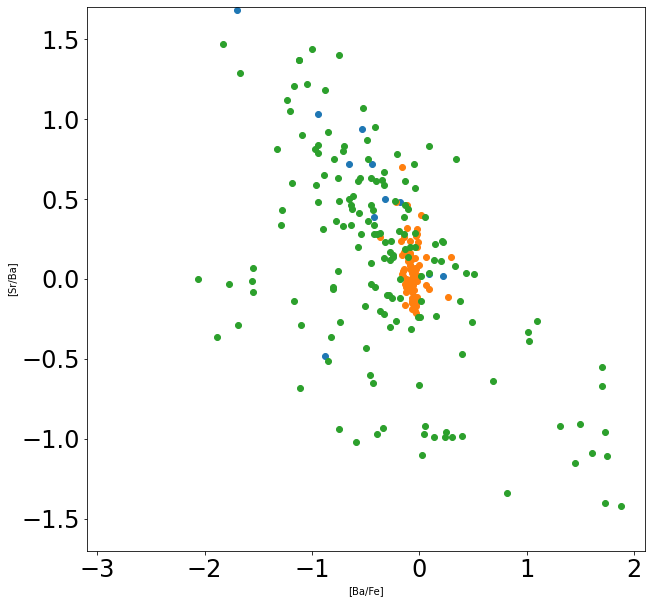

In [168]:
f = plt.figure(figsize=[10,10])
plt.scatter(all_elem[16],all_elem[13]-all_elem[16])
plt.scatter(bnb2014_td[bnb_xh_names[16]],(bnb2014_td[bnb_xh_names[13]]-bnb2014_td['Fe/H'])-bnb2014_td[bnb_xh_names[16]])
plt.scatter(yong2013_halo[y13_xfe_names[16]],(yong2013_halo[y13_xfe_names[13]])-yong2013_halo[y13_xfe_names[16]])
plt.xlim([-3.1,2.1])
plt.ylim([-1.7,1.7])
plt.ylabel('[Sr/Ba]')
plt.xlabel('[Ba/Fe]')
plt.show()

<ipython-input-21-f71931065861>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_y13_data[k] = np.nan # Simply ignore any upper limit
/opt/anaconda3/envs/pandas_project/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-21-f71931065861>:191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_y13_data1[k] = np.nan # Simply ignor

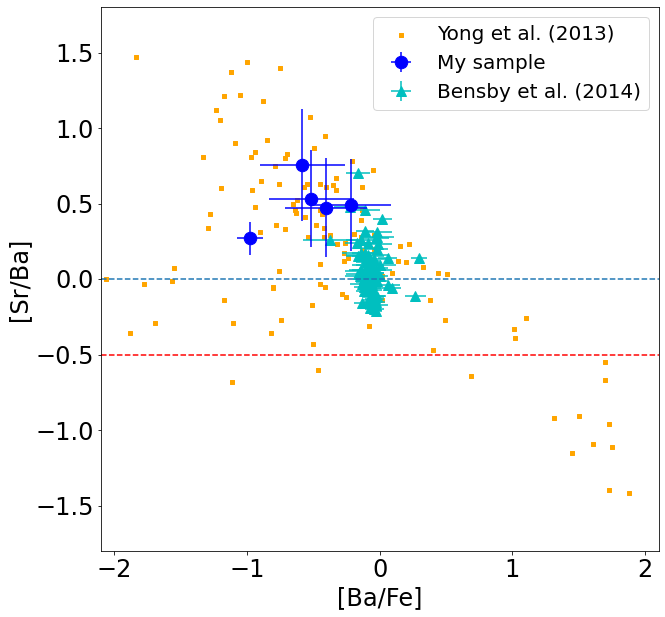

In [29]:
make_one_errorbar(16,13,all_elem,all_elem_std,xlim=[-2.1,2.1],ylim=[-1.8,1.8],y_axis_add=16,
                  x_label='[Ba/Fe]',y_label='[Sr/Ba]',file_name='mwtd_srba_bafe_1121.pdf')

<ipython-input-26-de58d6f44822>:191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_y13_data1[k] = np.nan # Simply ignore any upper limit
/opt/anaconda3/envs/pandas_project/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-26-de58d6f44822>:224: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_y13_data2[k] = np.nan # Simply ign

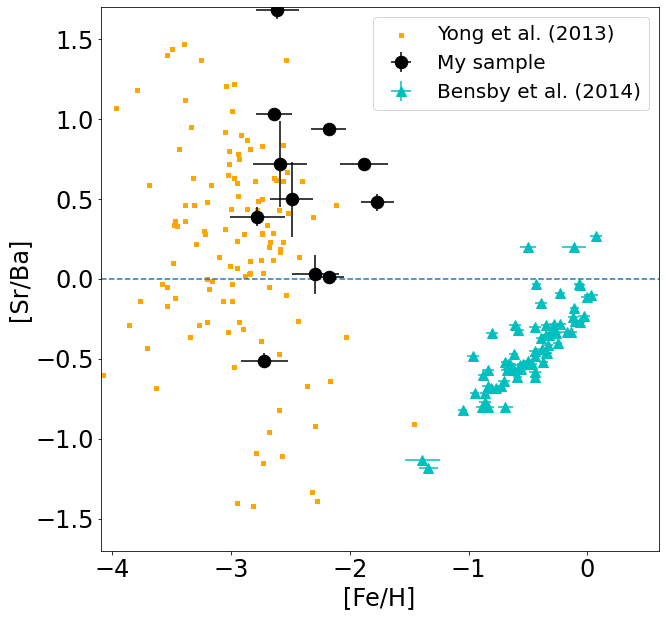

In [28]:
make_one_errorbar(-1,13,all_elem,all_elem_std,xlim=[-4.1,0.6],ylim=[-1.7,1.7],y_axis_add=16,x_label='[Fe/H]',y_label='[Sr/Ba]')

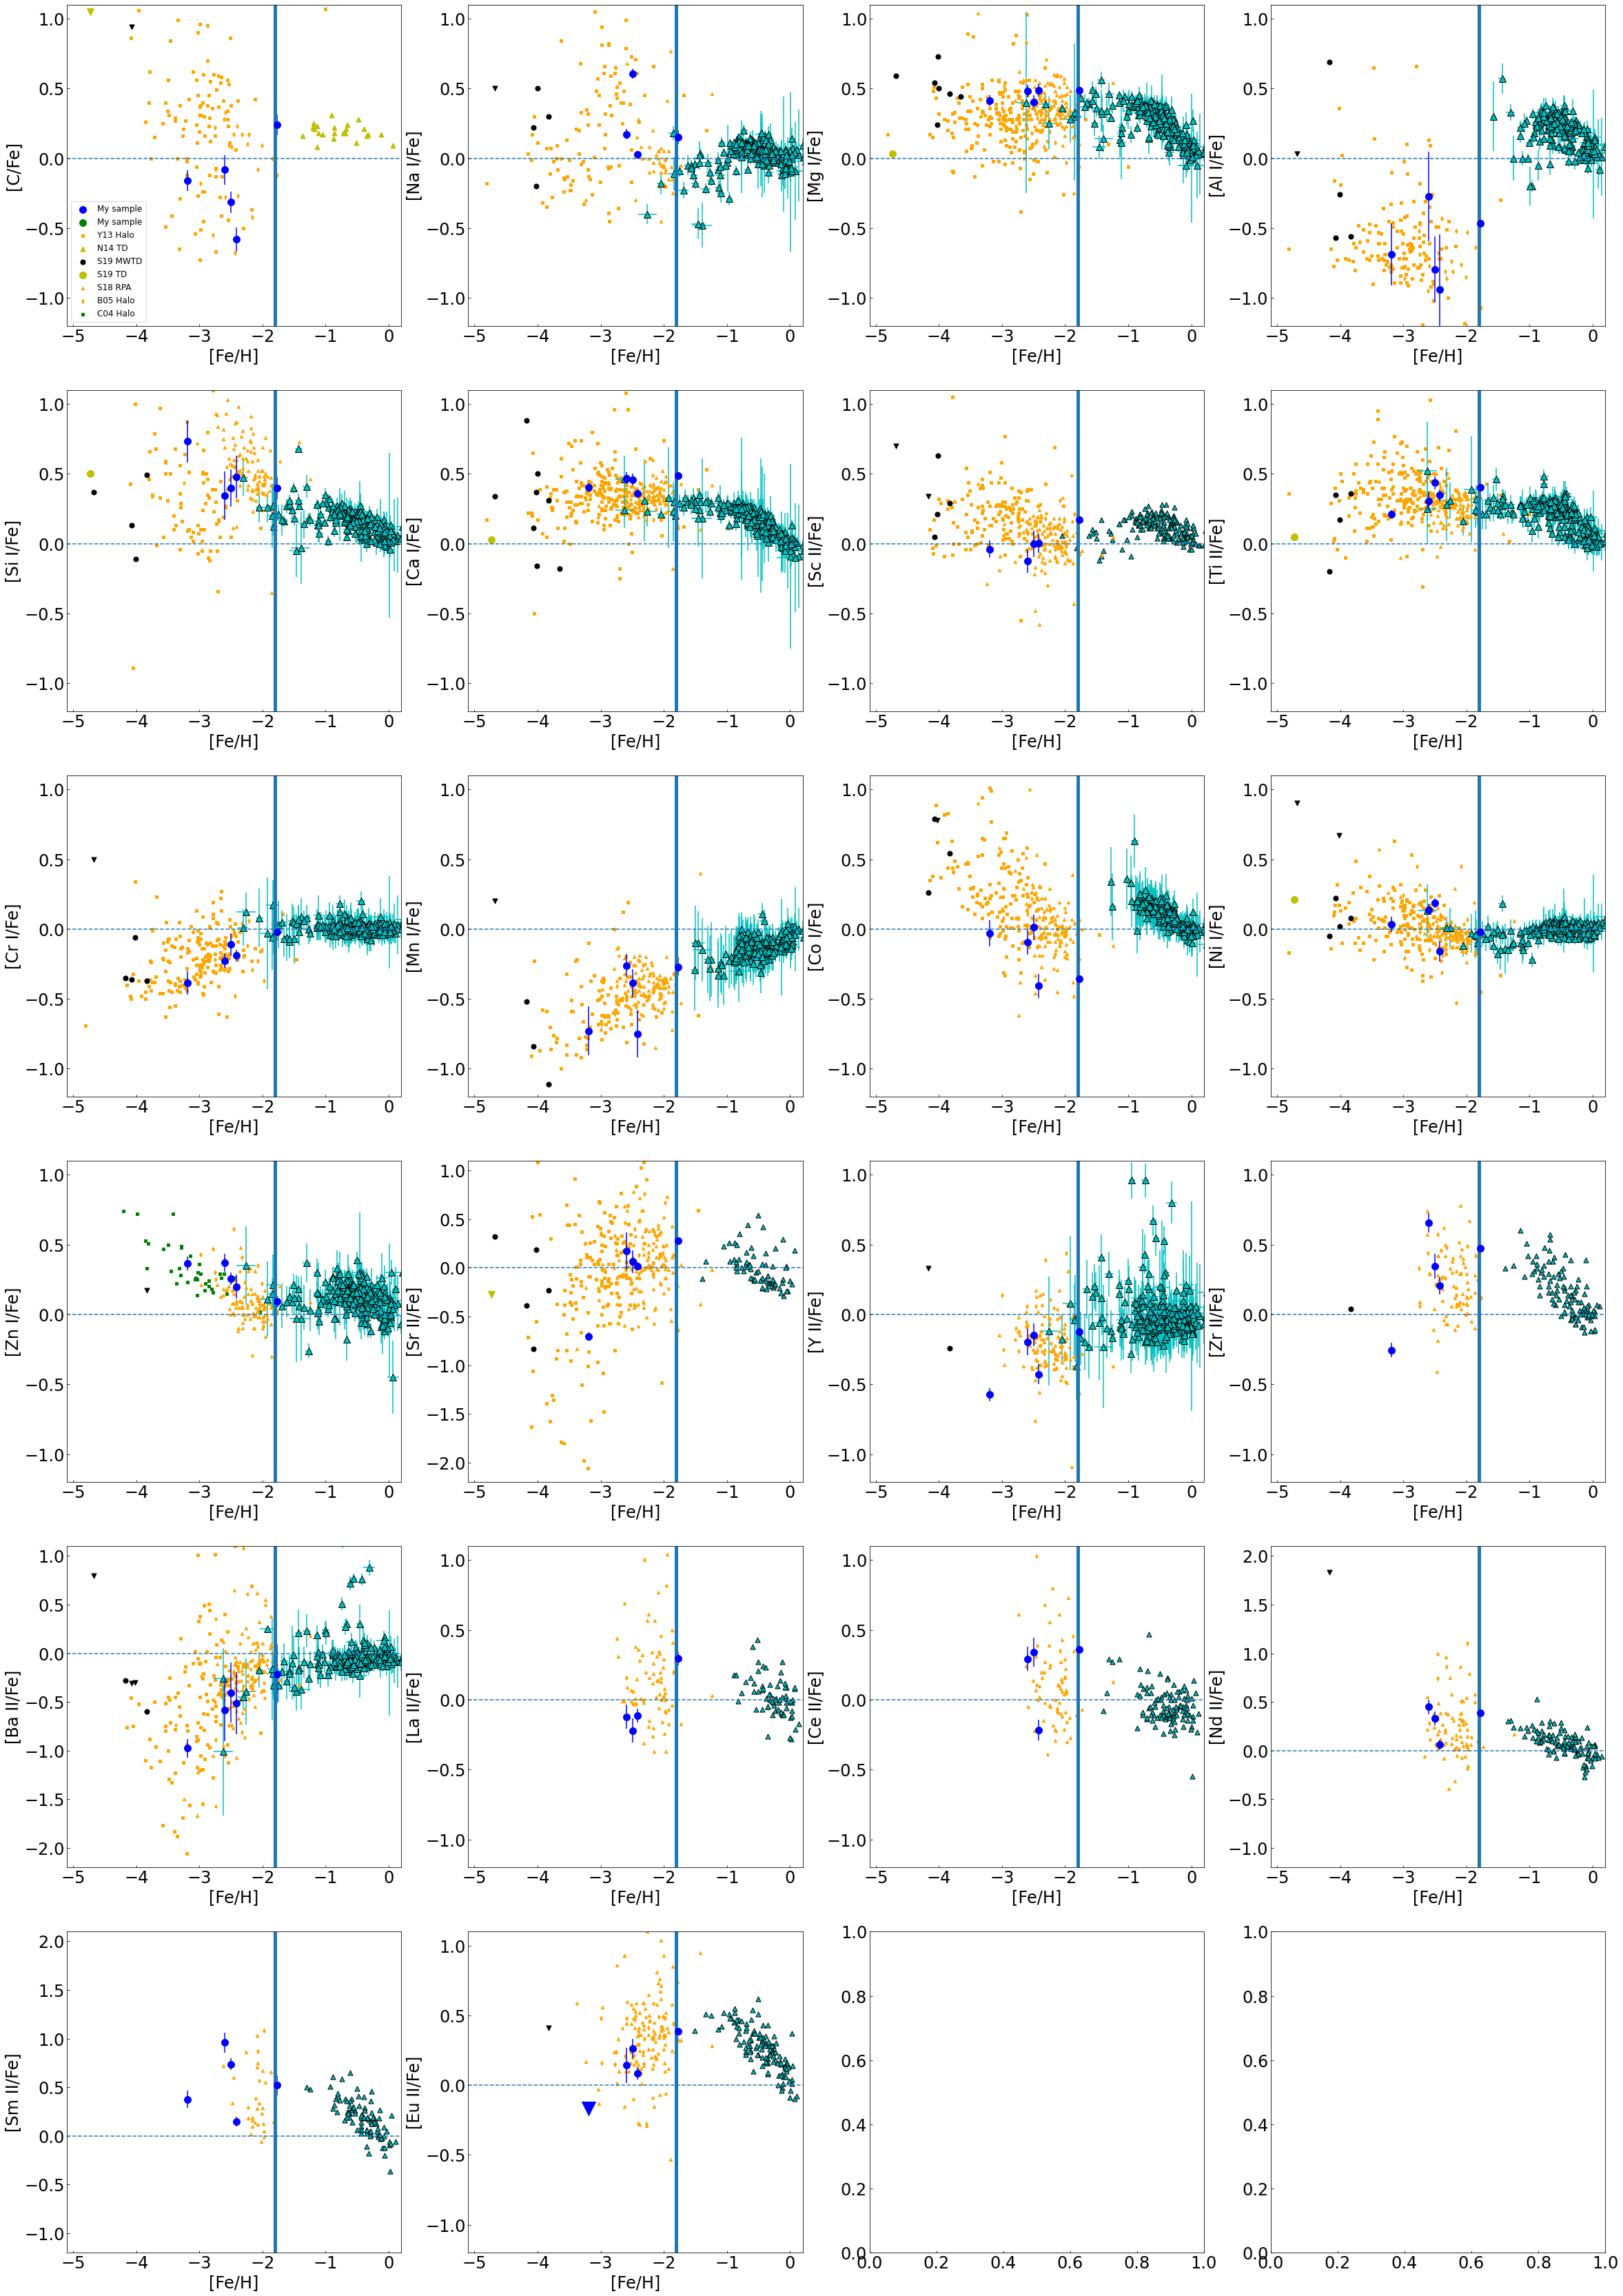

In [244]:
make_plots_errorbar(6,4,all_elem,all_elem_std,feh_disk=[],disk_elem=[],xlim=[-5.1,0.2],ylim=[-1.2,1.1],
                    elem_labels=abund_labels,add_lit=True,nlte_diff=False,file_name='mwtd_abund_plots_err_nlte_lbl_1220.pdf')

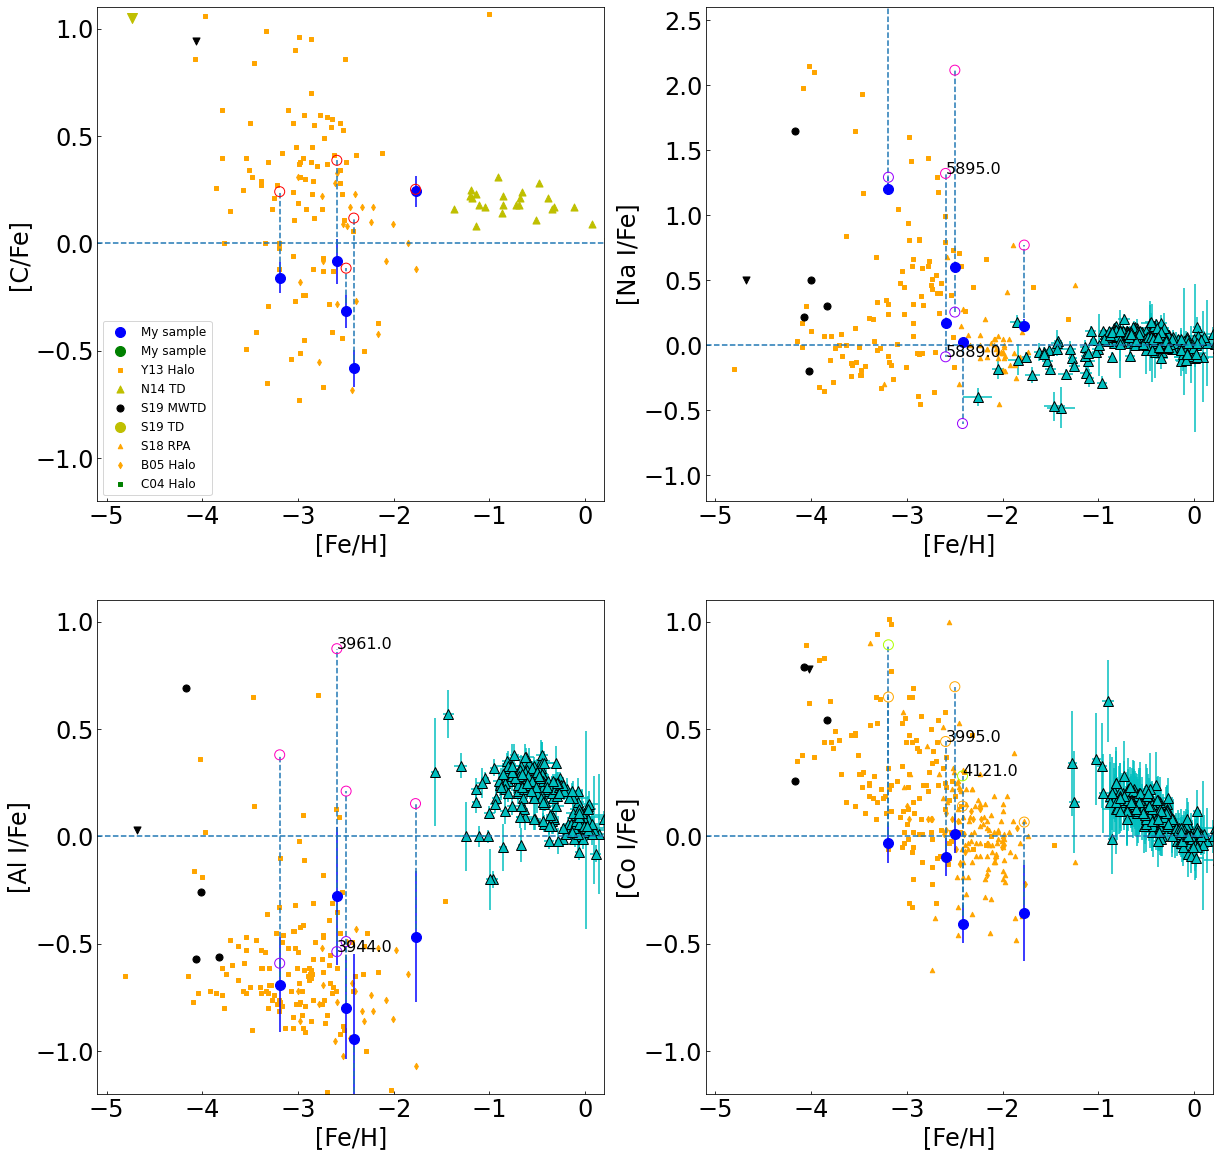

In [258]:
make_plots_errorbar(2,2,all_elem,all_elem_std,elem_range=np.array([0,1,3,10]),feh_disk=[],disk_elem=[],xlim=[-5.1,0.2],ylim=[-1.2,1.1],
                    elem_labels=abund_labels,add_lit=True,nlte_diff=True,file_name='mwtd_abund_plots_err_nlte_diff_1220.pdf')

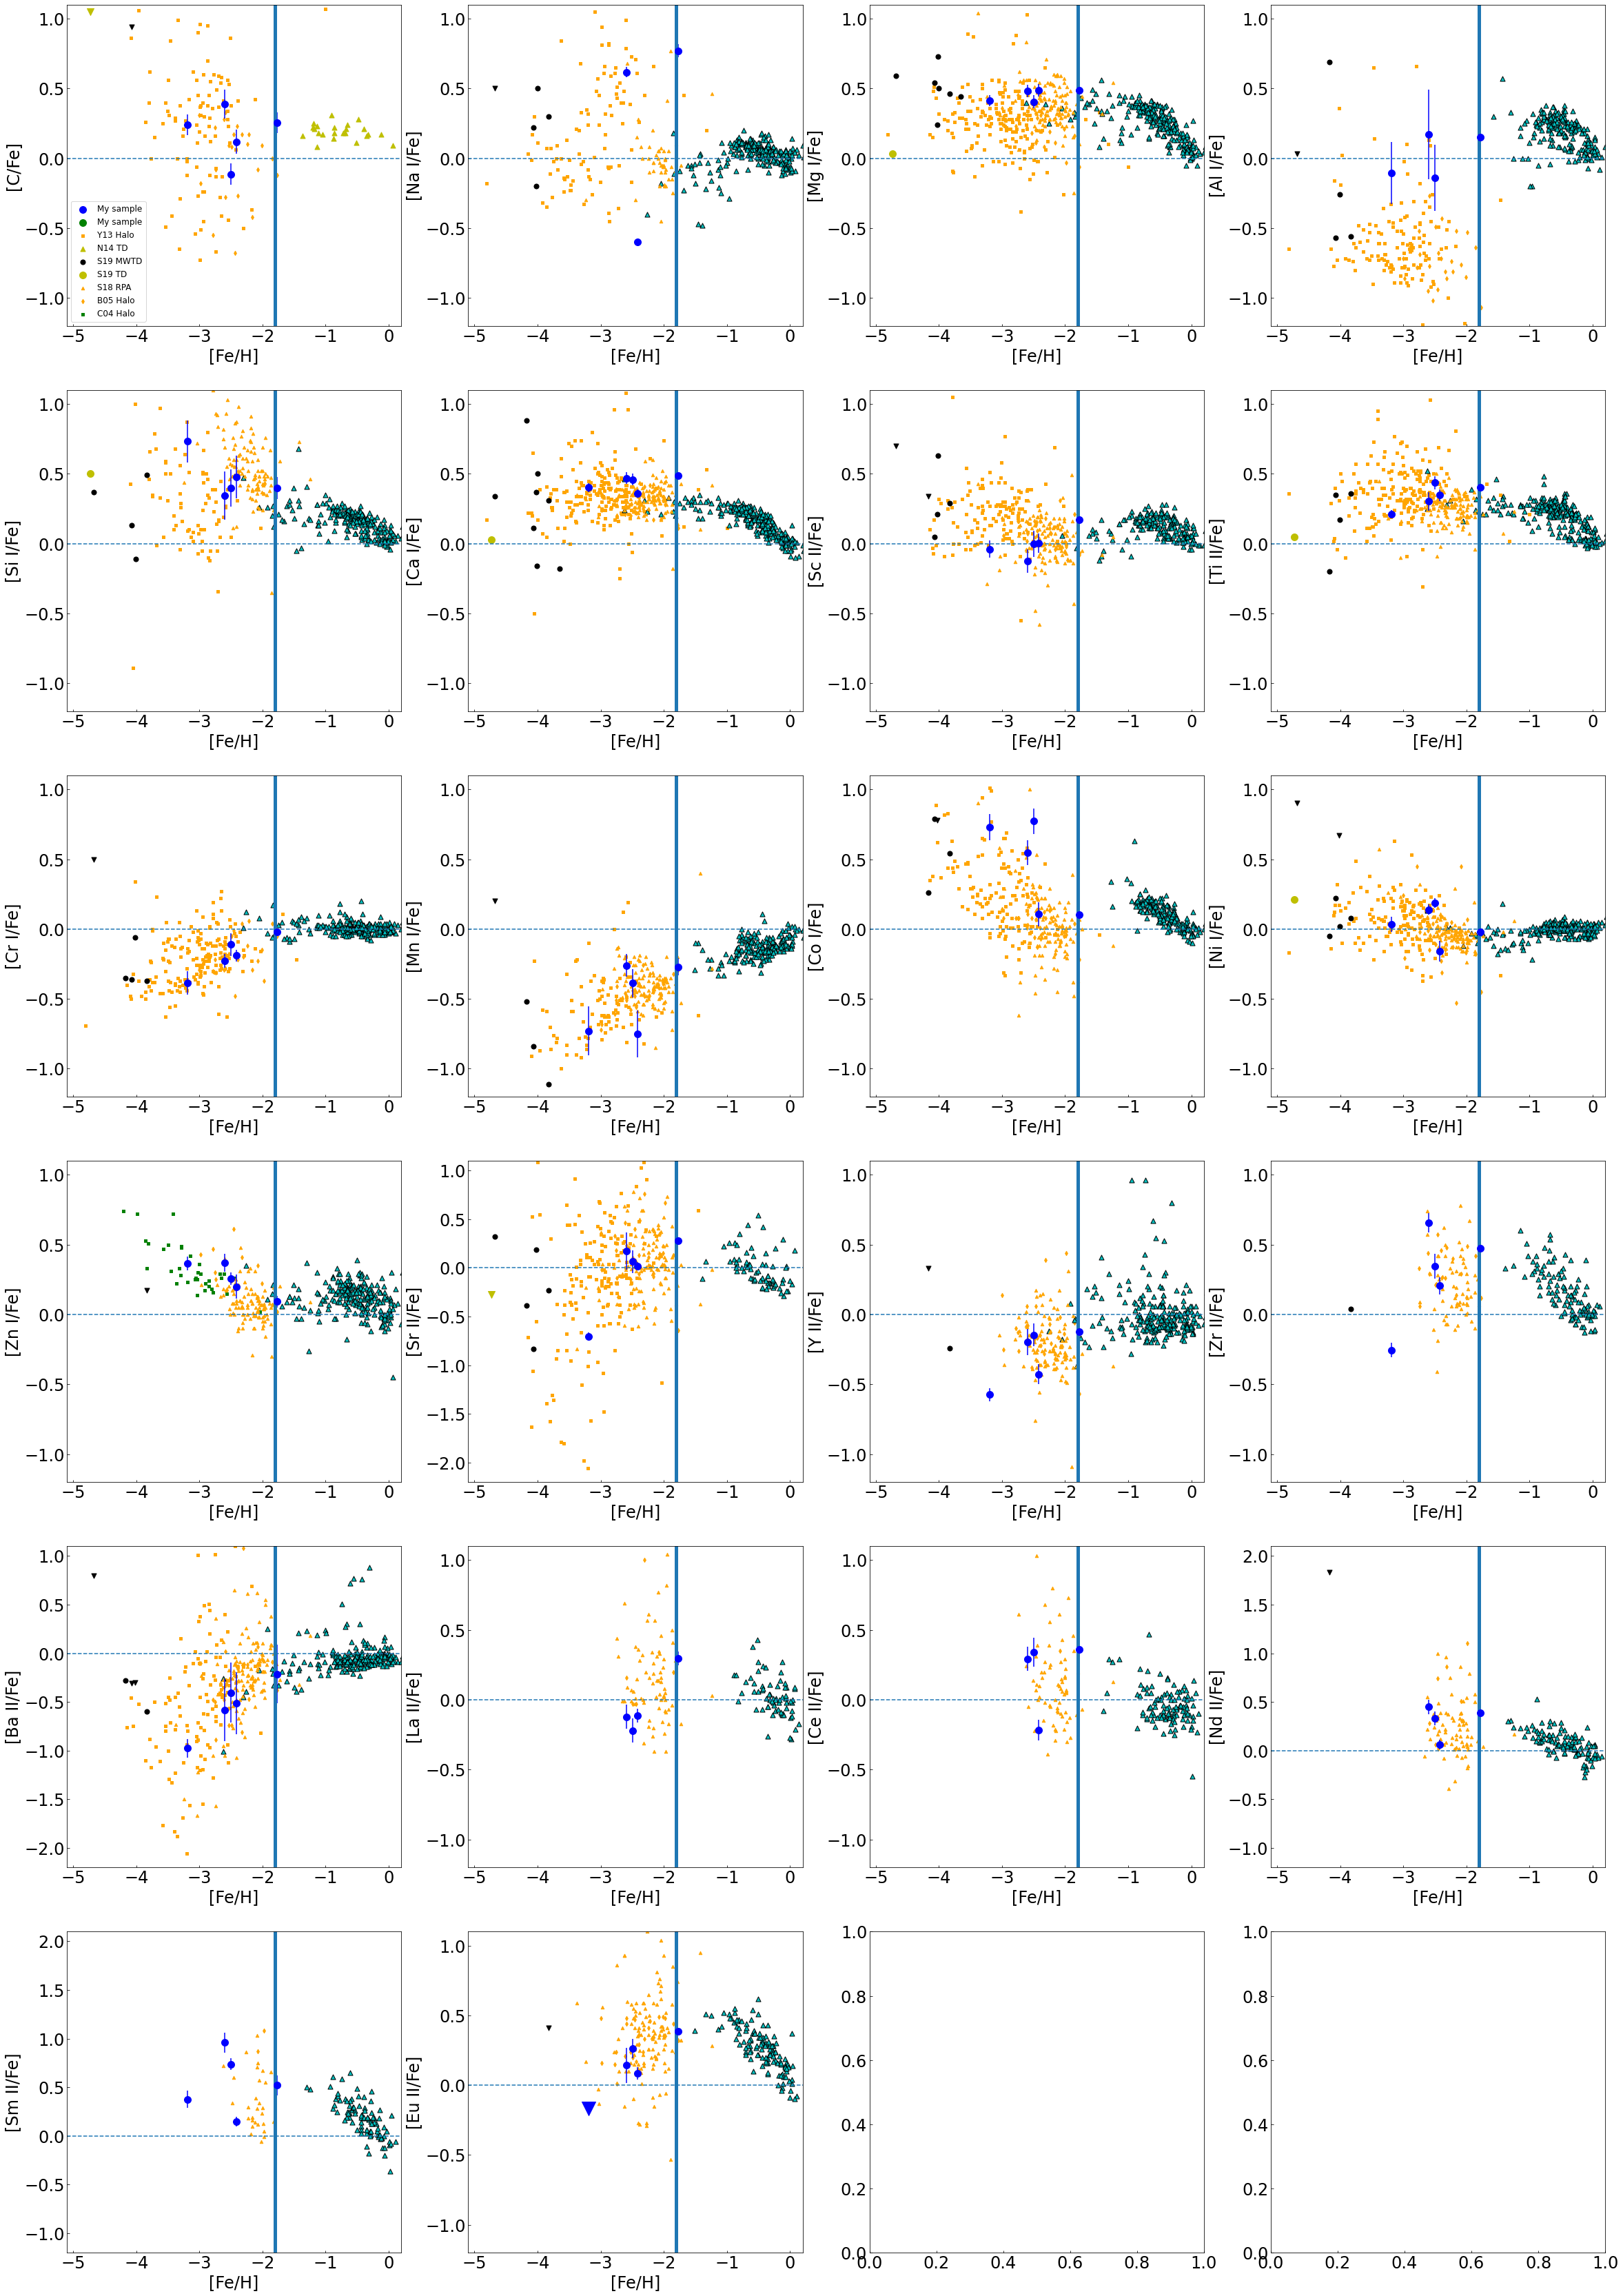

In [175]:
make_plots_errorbar(6,4,all_elem,all_elem_std,feh_disk=[],disk_elem=[],xlim=[-5.1,0.2],ylim=[-1.2,1.1],
                    elem_labels=abund_labels,add_lit=True,file_name='mwtd_abund_plots_err_1207_no_bnb_error.pdf',
                    bnb_errorbar=False)

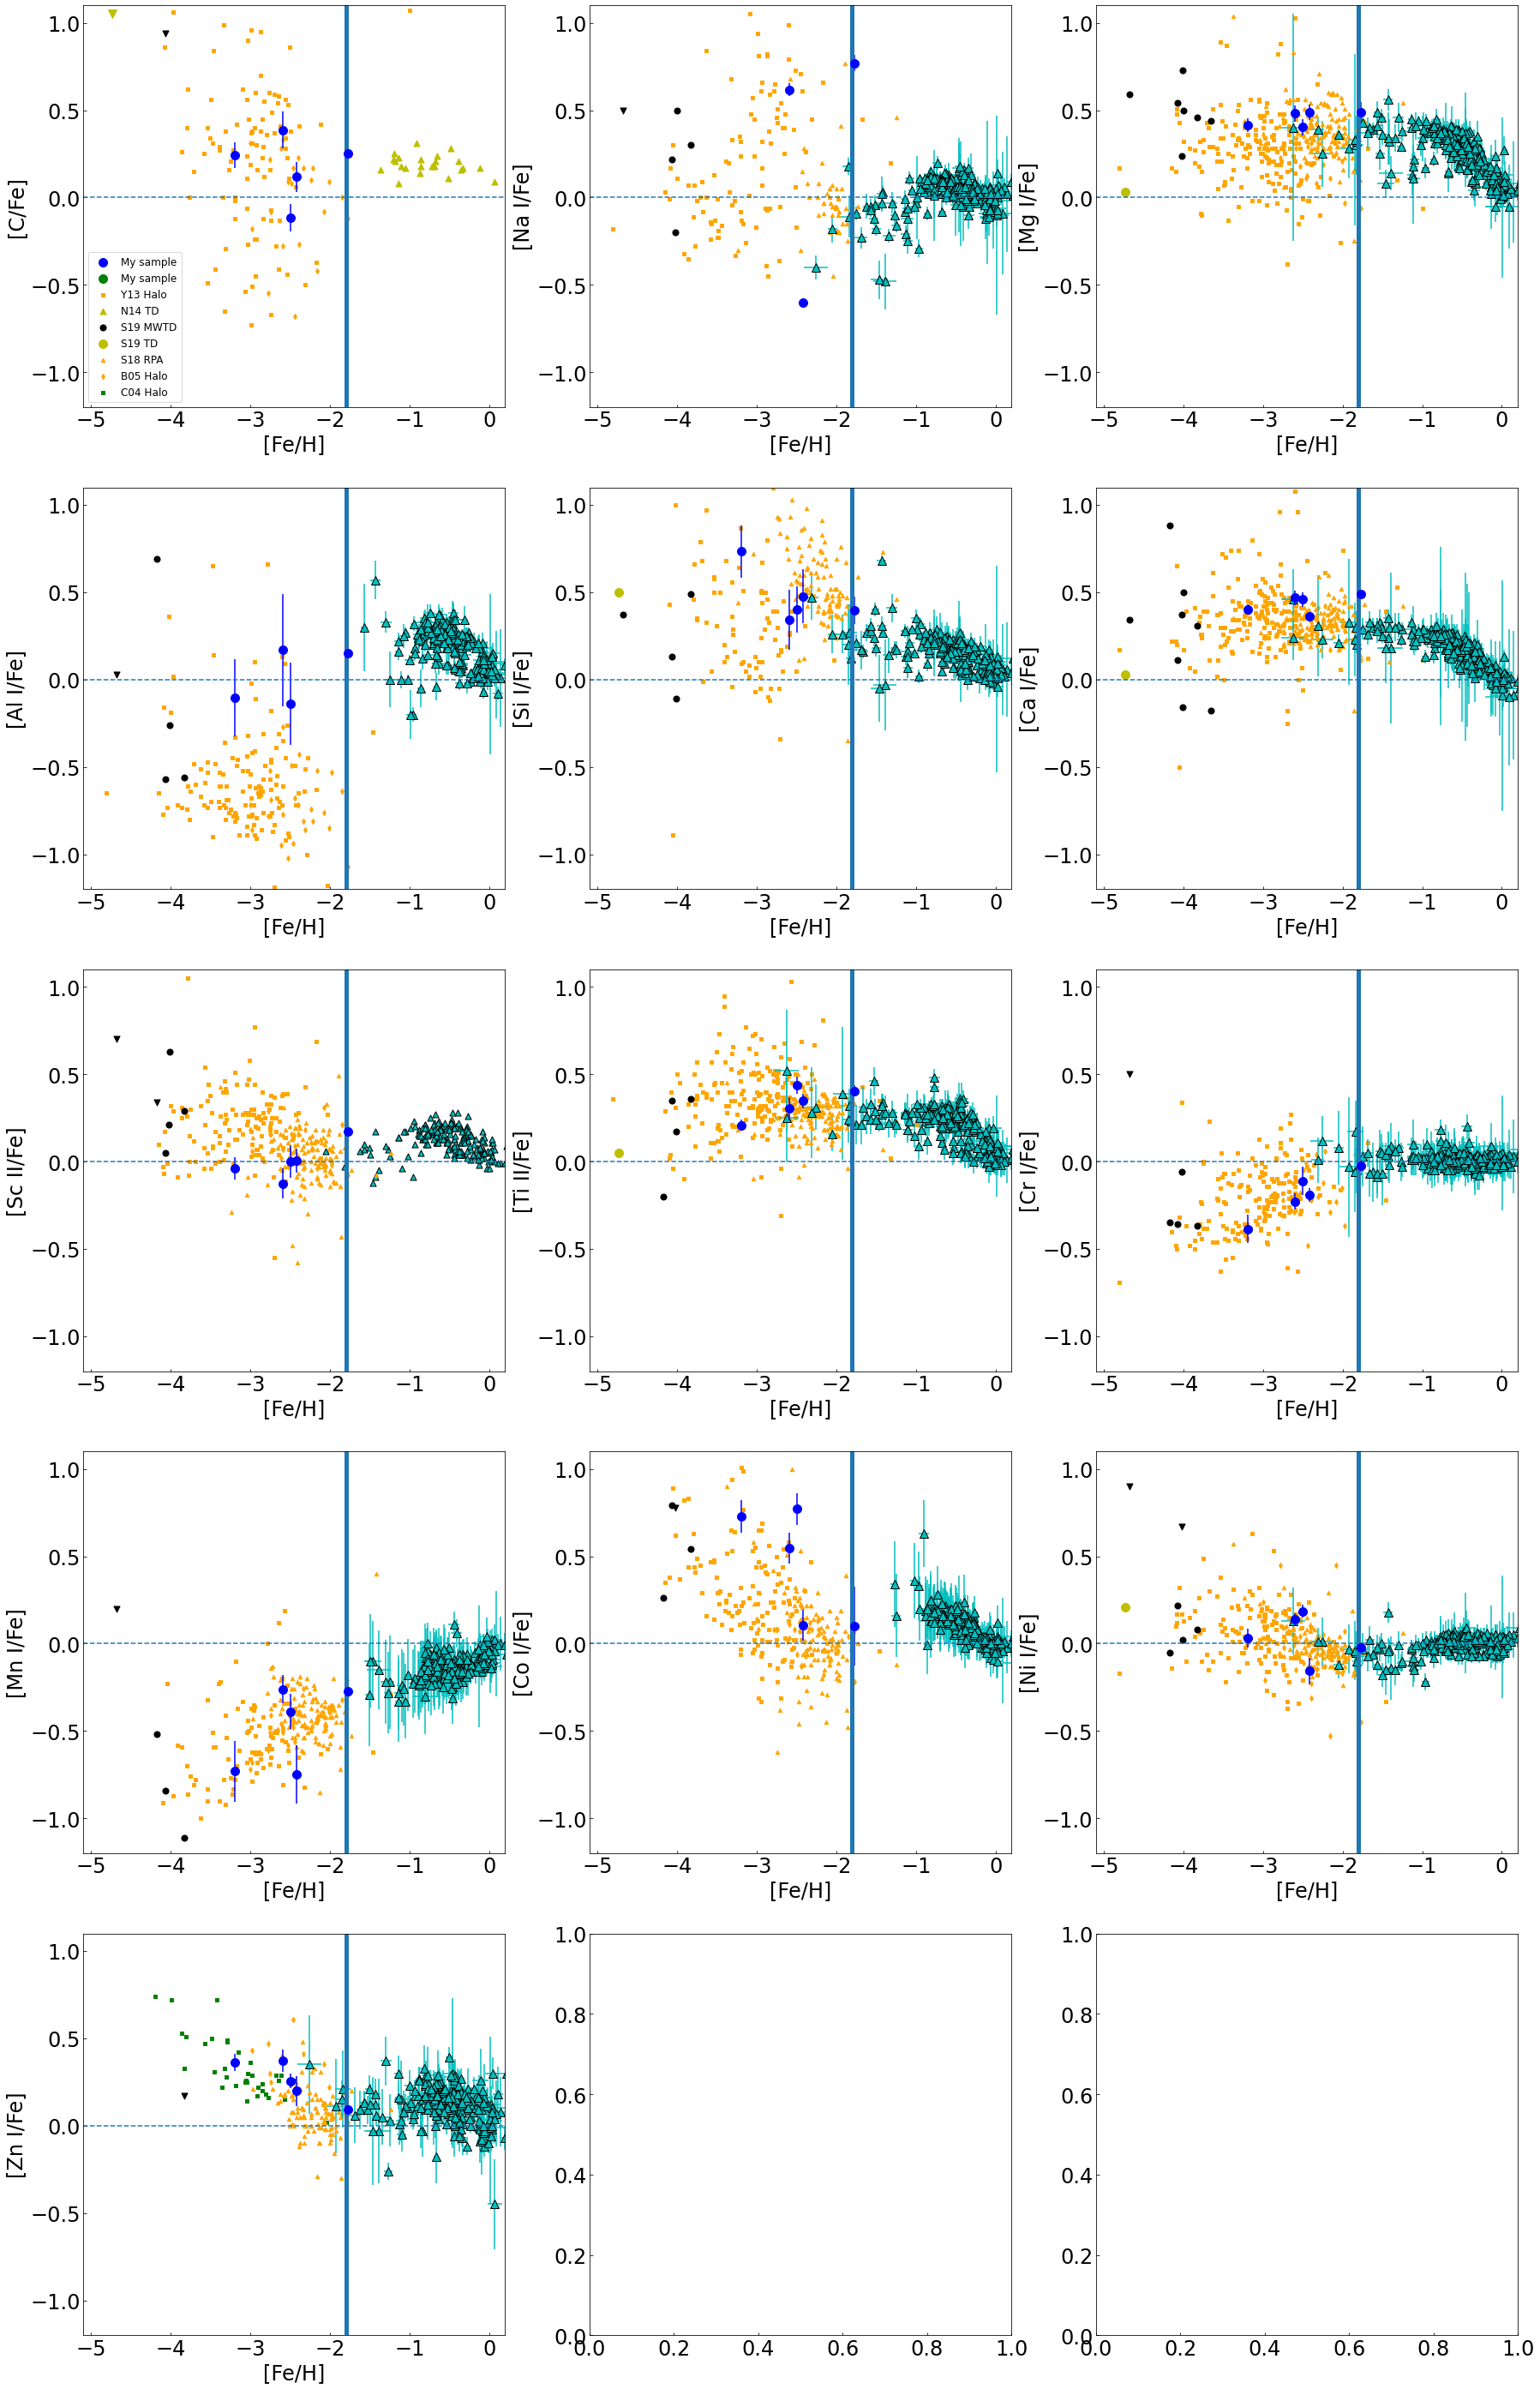

In [176]:
make_plots_errorbar(5,3,all_elem,all_elem_std,elem_range=np.array([0,1,2,3,4,5,6,7,8,9,10,11,12]),feh_disk=[],disk_elem=[],xlim=[-5.1,0.2],ylim=[-1.2,1.1],
                    elem_labels=abund_labels,add_lit=True,file_name='mwtd_abund_no_rproc_plots_err_1207.pdf')

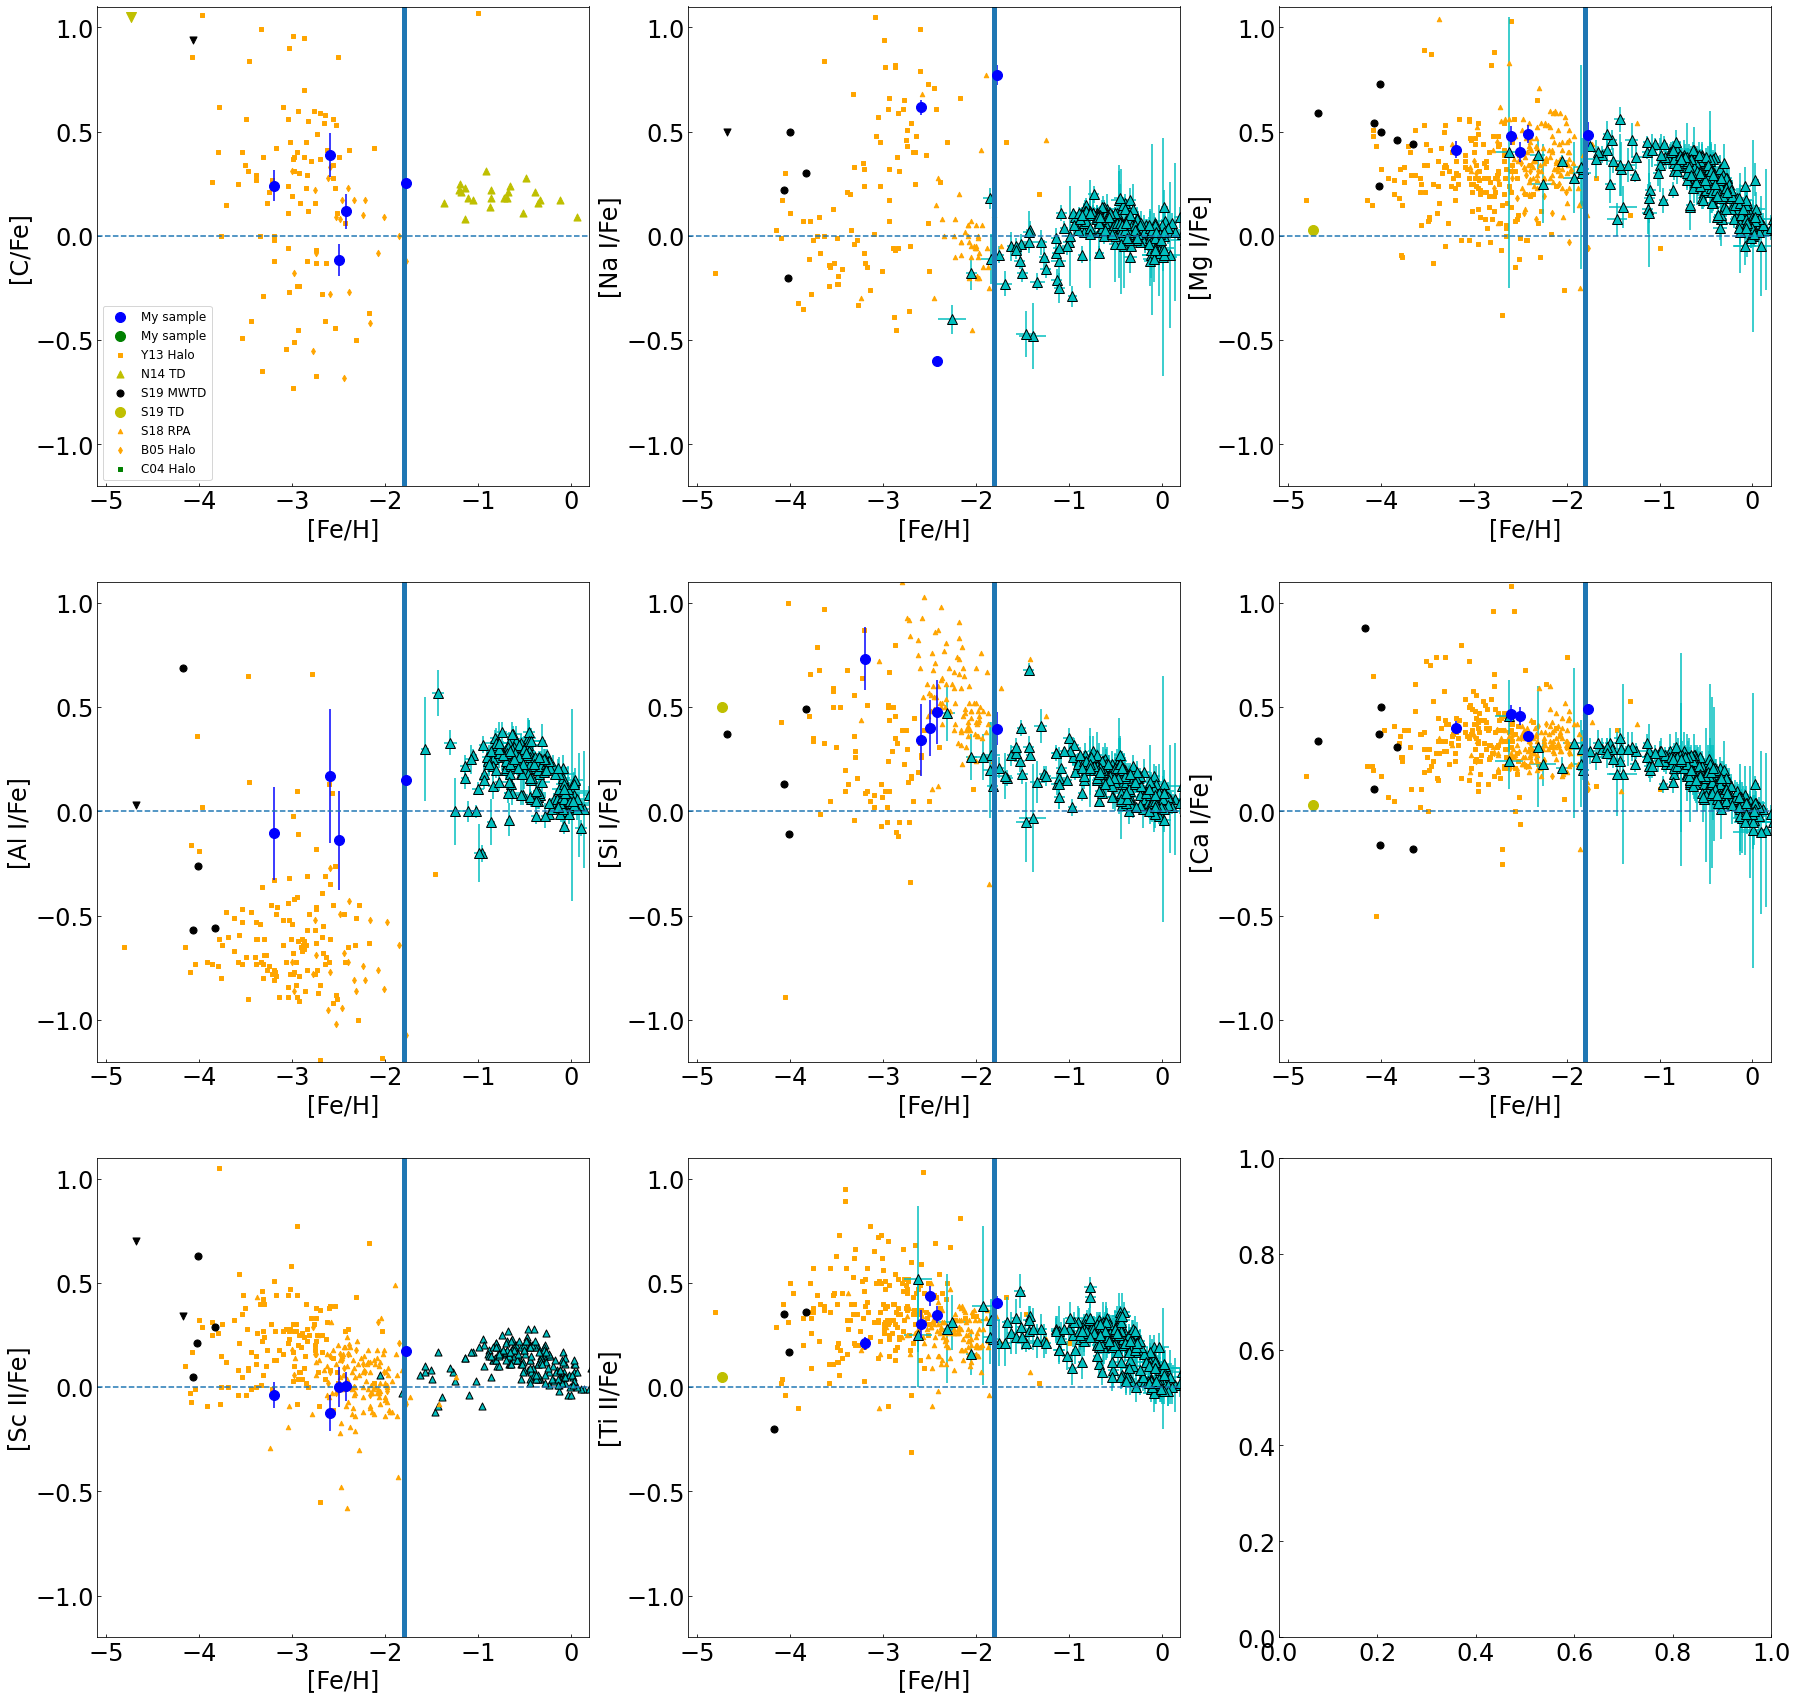

In [177]:
make_plots_errorbar(3,3,all_elem,all_elem_std,elem_range=np.array([0,1,2,3,4,5,6,7]),feh_disk=[],disk_elem=[],xlim=[-5.1,0.2],ylim=[-1.2,1.1],
                    elem_labels=abund_labels,add_lit=True,file_name='mwtd_abund_light_plots_err_1207.pdf')

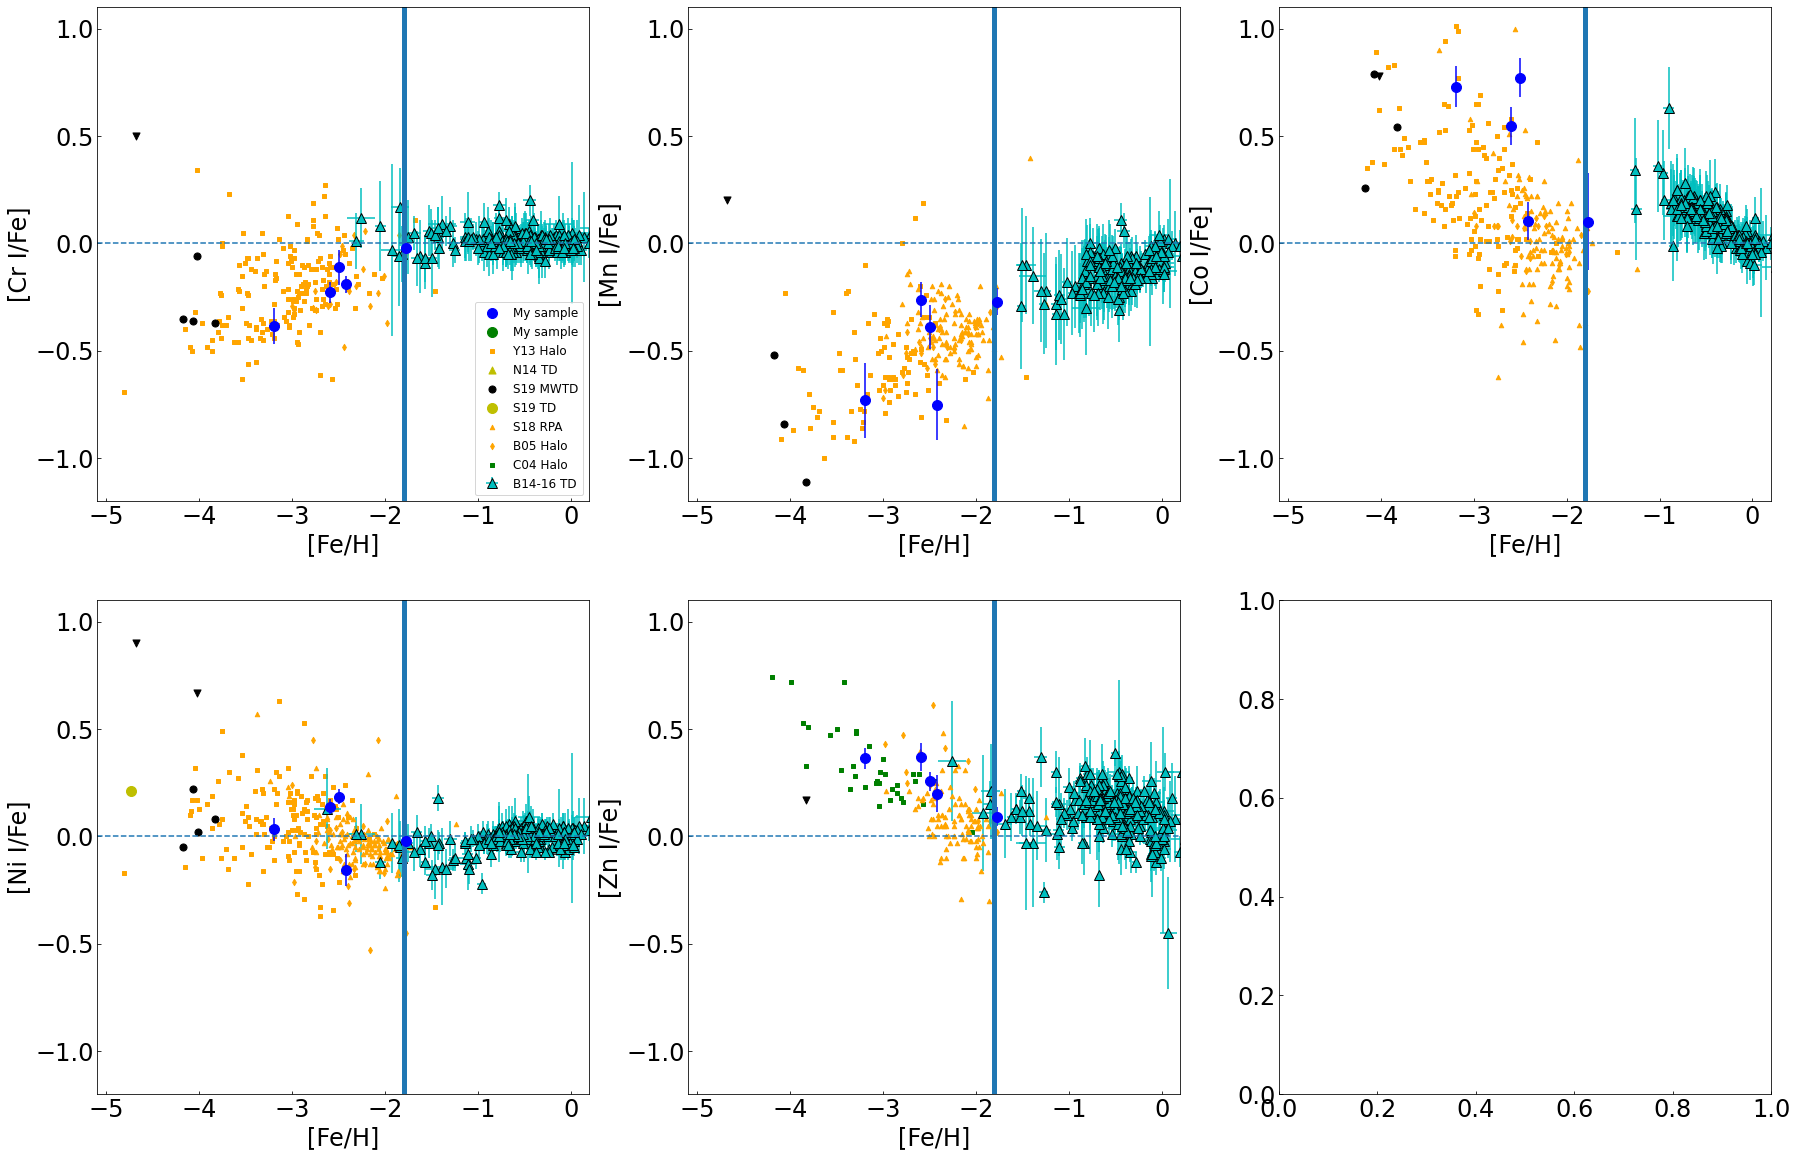

In [178]:
make_plots_errorbar(2,3,all_elem,all_elem_std,elem_range=np.array([8,9,10,11,12]),feh_disk=[],disk_elem=[],xlim=[-5.1,0.2],ylim=[-1.2,1.1],
                    elem_labels=abund_labels,add_lit=True,file_name='mwtd_abund_ironpeak_plots_err_1207.pdf')

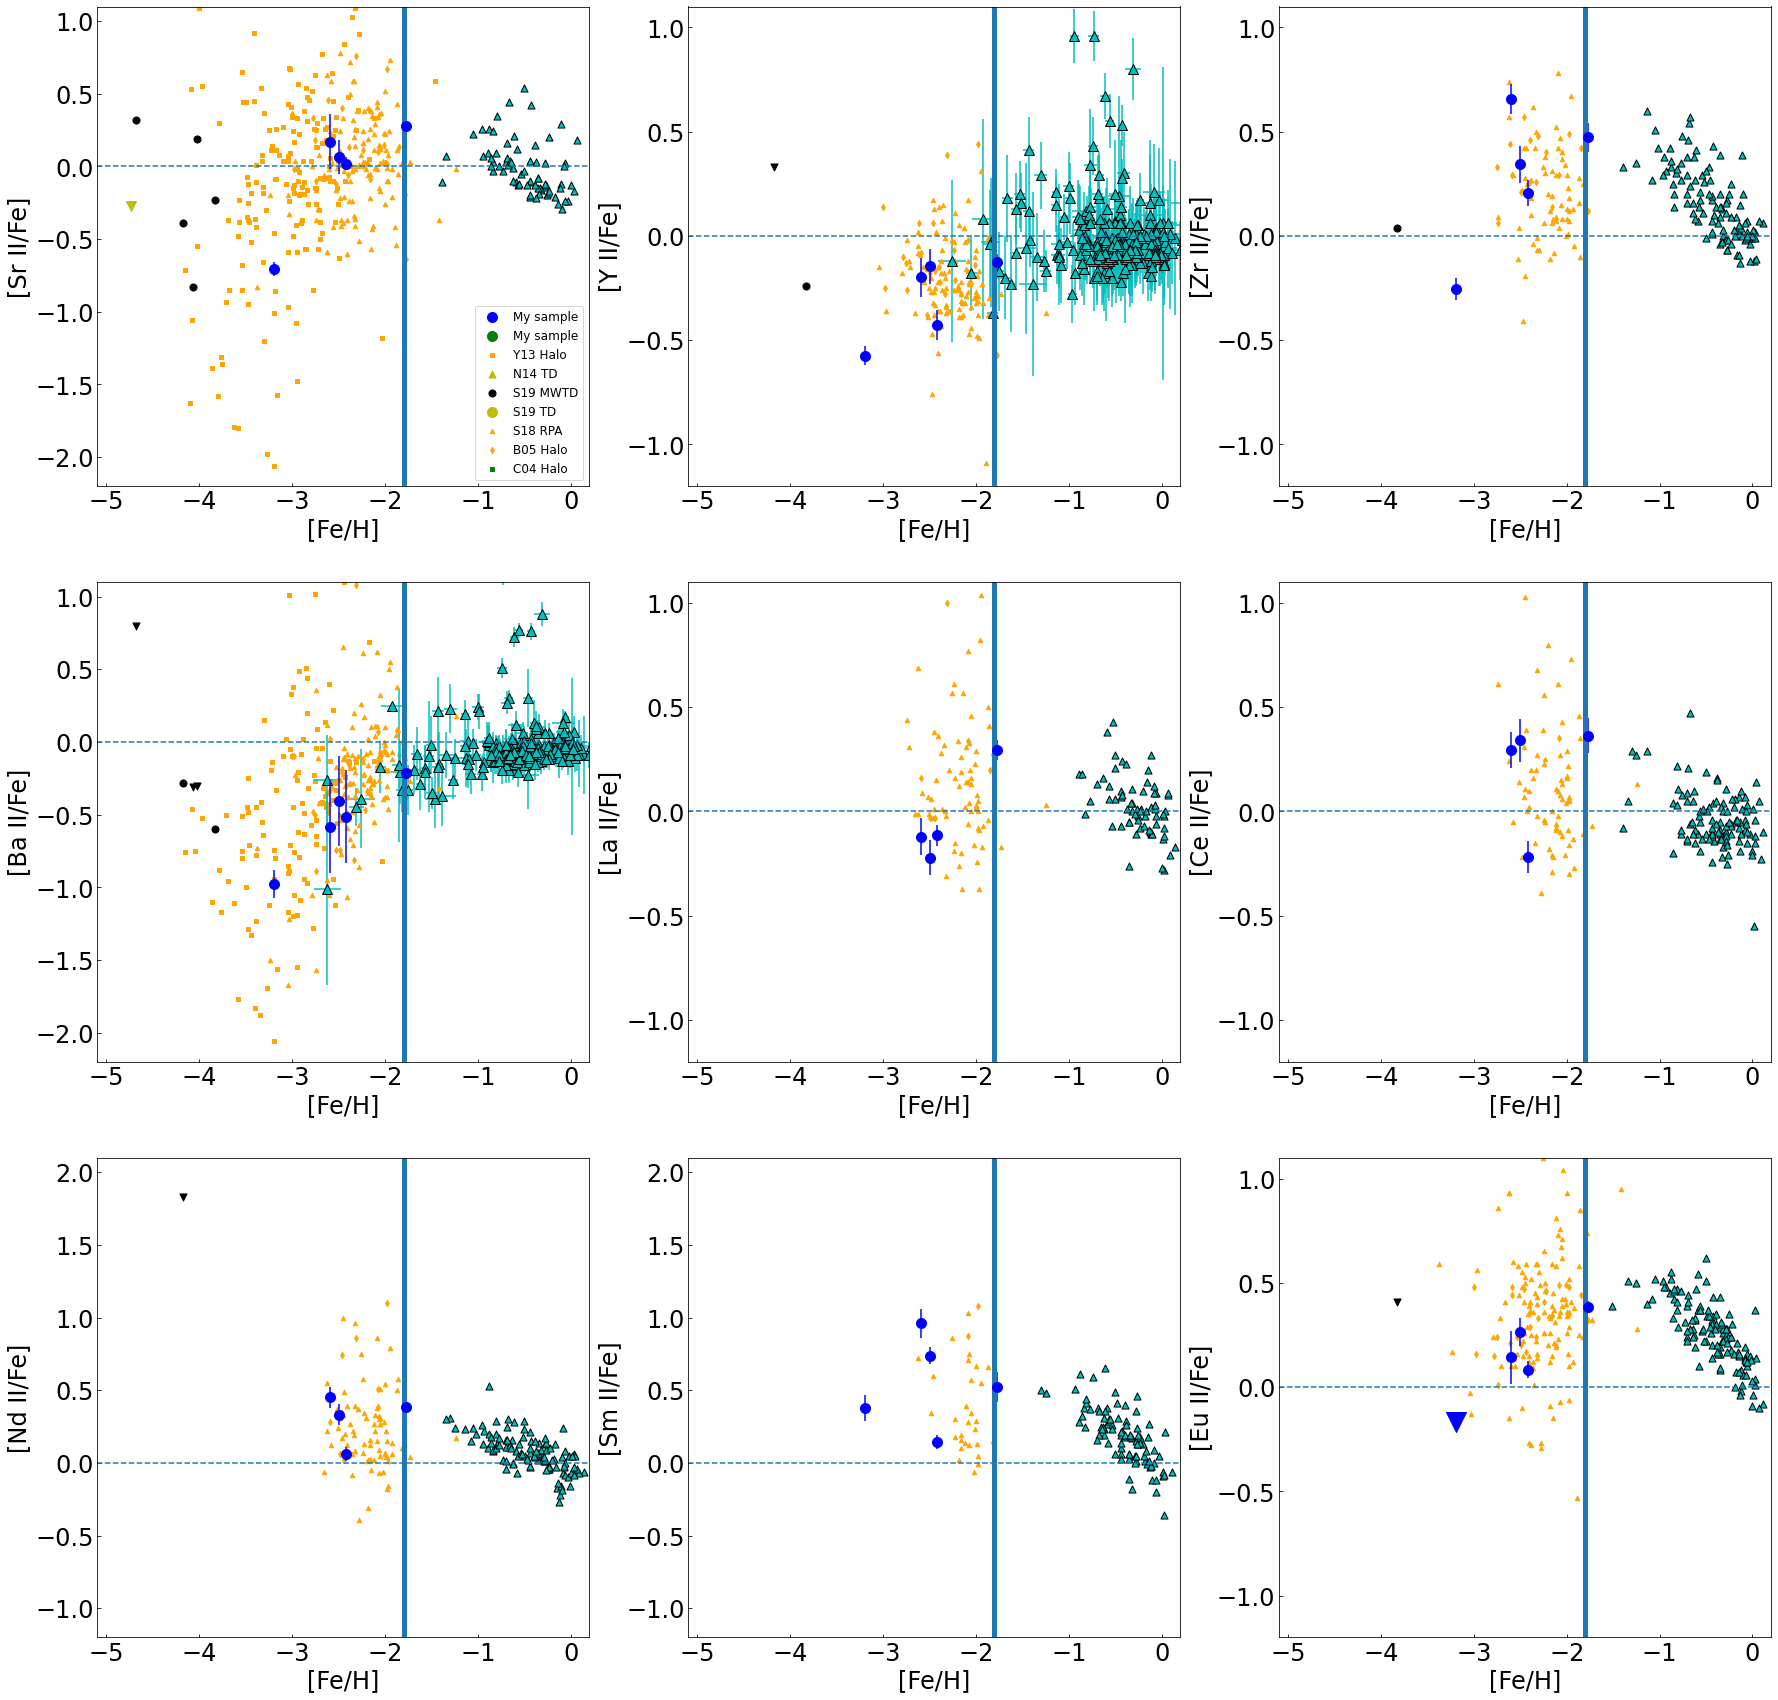

In [179]:
make_plots_errorbar(3,3,all_elem,all_elem_std,elem_range=np.arange(13,22),feh_disk=[],disk_elem=[],xlim=[-5.1,0.2],ylim=[-1.2,1.1],
                    elem_labels=abund_labels,add_lit=True,file_name='mwtd_abund_rproc_plots_err_1207.pdf')

In [117]:
feh_all,all_elem[8],all_elem[16], abund_name#, orb_df['Orthogonal_angular_momentum_lz']

(array([-1.88, -2.18, -2.72, -2.29, -2.78, -1.76, -2.17, -2.49, -2.64,
        -2.61, -2.59]),
 array([ 0.07,  0.23, -1.7 ,  0.12, -0.03,  0.3 ,  0.3 ,  0.18,  0.09,
        -0.02,  0.28]),
 array([ 0.05,  0.43,  0.03,  0.51,  0.36,  0.53, -0.15,  0.35,  0.27,
        -0.27,  0.37]),
 array(['smss709', 'smss1_12', 'smss338', 'smss1_09', 'smss712',
        'smss1_29', 'smss1_18', 'smss697', 'smss343', 'smss710',
        'smss1_33'], dtype='<U8'))

In [149]:
feh_all,all_elem[13]+feh_all,all_elem[16]+feh_all, abund_name#, orb_df['Orthogonal_angular_momentum_lz']

(array([-1.88, -2.18, -2.72, -2.29, -2.78, -1.76, -2.17, -2.49, -2.64,
        -2.61, -2.59]),
 array([-1.85, -1.84, -2.92, -1.82, -2.15, -1.68,   nan, -2.04, -2.32,
        -2.2 , -2.15]),
 array([-1.83, -1.75, -2.69, -1.78, -2.42, -1.23, -2.32, -2.14, -2.37,
        -2.88, -2.22]),
 array(['smss709', 'smss1_12', 'smss338', 'smss1_09', 'smss712',
        'smss1_29', 'smss1_18', 'smss697', 'smss343', 'smss710',
        'smss1_33'], dtype='<U8'))

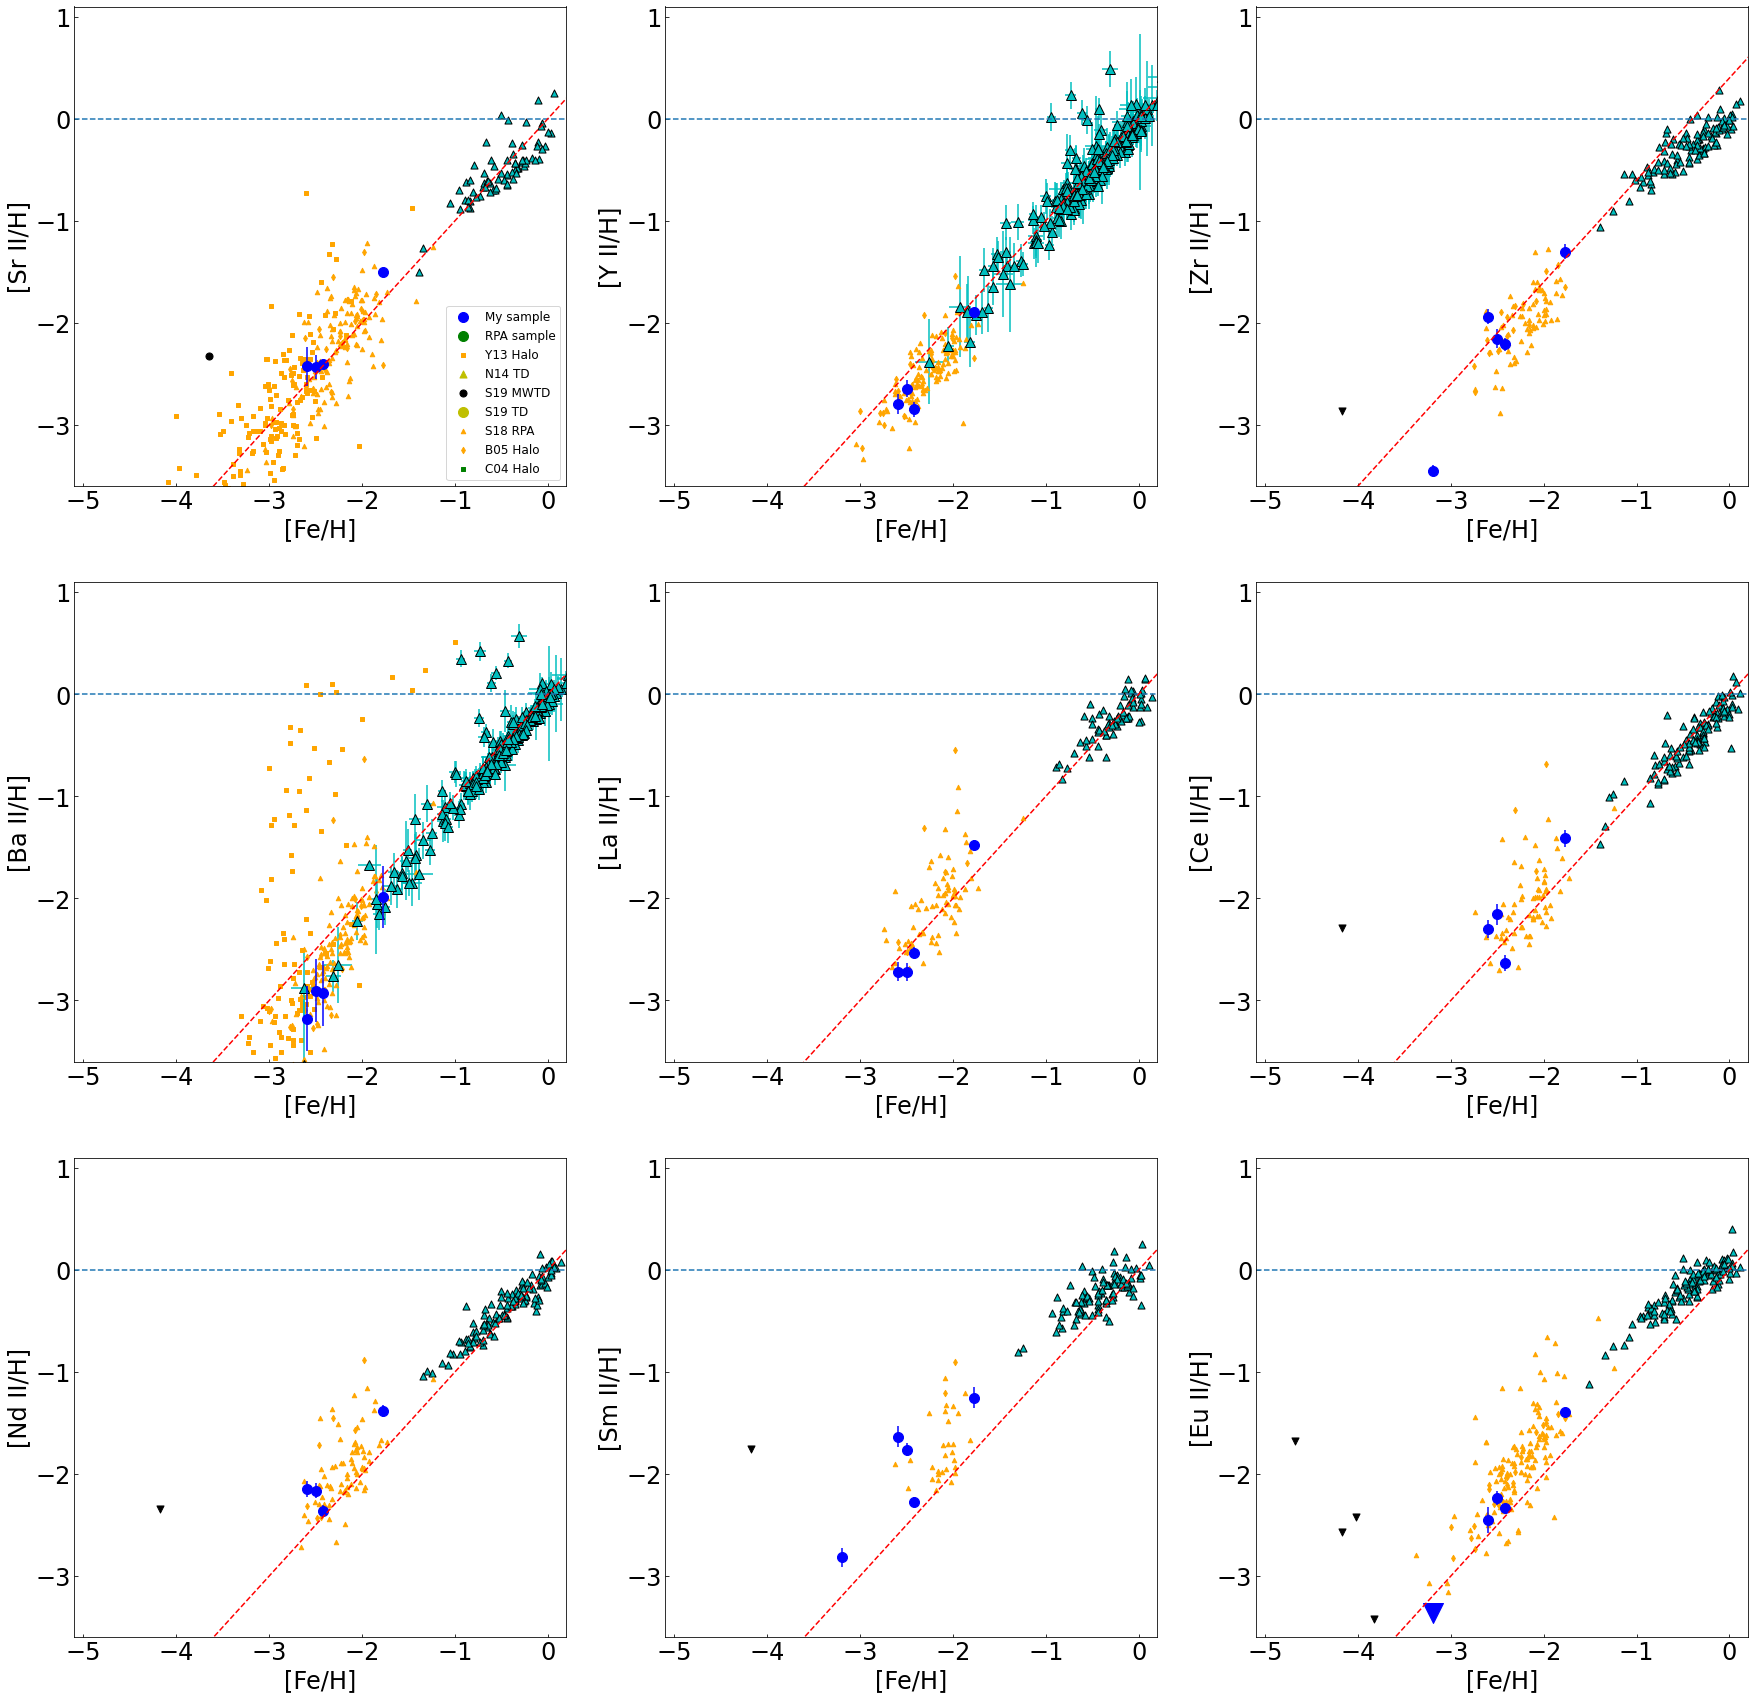

In [180]:
make_plots_errorbar_xh(3,3,all_elem,all_elem_std,elem_range=np.arange(13,22),feh_disk=[],disk_elem=[],
                       line_b_list=[0,0,0.4,0,0,0,0,0,0],
                       xlim=[-5.1,0.2],ylim=[-3.6,1.1],
                       elem_labels=abund_labels_xh,add_lit=True,file_name='mwtd_rporc_xh_plots_err_1207.pdf')

In [95]:
all_elem

array([[-0.083, -0.582, -0.159,  0.242, -0.315],
       [ 0.171,  0.028,  1.202,  0.15 ,  0.605],
       [ 0.481,  0.488,  0.413,  0.486,  0.403],
       [-0.276, -0.941, -0.69 , -0.467, -0.799],
       [ 0.343,  0.477,  0.733,  0.397,  0.4  ],
       [ 0.469,  0.36 ,  0.401,  0.489,  0.459],
       [-0.125,  0.004, -0.039,  0.171,  0.   ],
       [ 0.304,  0.347,  0.209,  0.404,  0.436],
       [-0.228, -0.191, -0.385, -0.023, -0.111],
       [-0.261, -0.75 , -0.73 , -0.271, -0.388],
       [-0.095, -0.408, -0.03 , -0.356,  0.013],
       [ 0.139, -0.157,  0.033, -0.021,  0.186],
       [ 0.371,  0.199,  0.364,  0.092,  0.256],
       [ 0.171,  0.019, -0.706,  0.276,  0.066],
       [-0.199, -0.428, -0.575, -0.124, -0.146],
       [ 0.656,  0.206, -0.255,  0.472,  0.344],
       [-0.583, -0.513, -0.976, -0.214, -0.406],
       [-0.121, -0.114,    nan,  0.295, -0.221],
       [ 0.294, -0.217,    nan,  0.363,  0.341],
       [ 0.45 ,  0.06 ,    nan,  0.387,  0.332],
       [ 0.959,  0.1

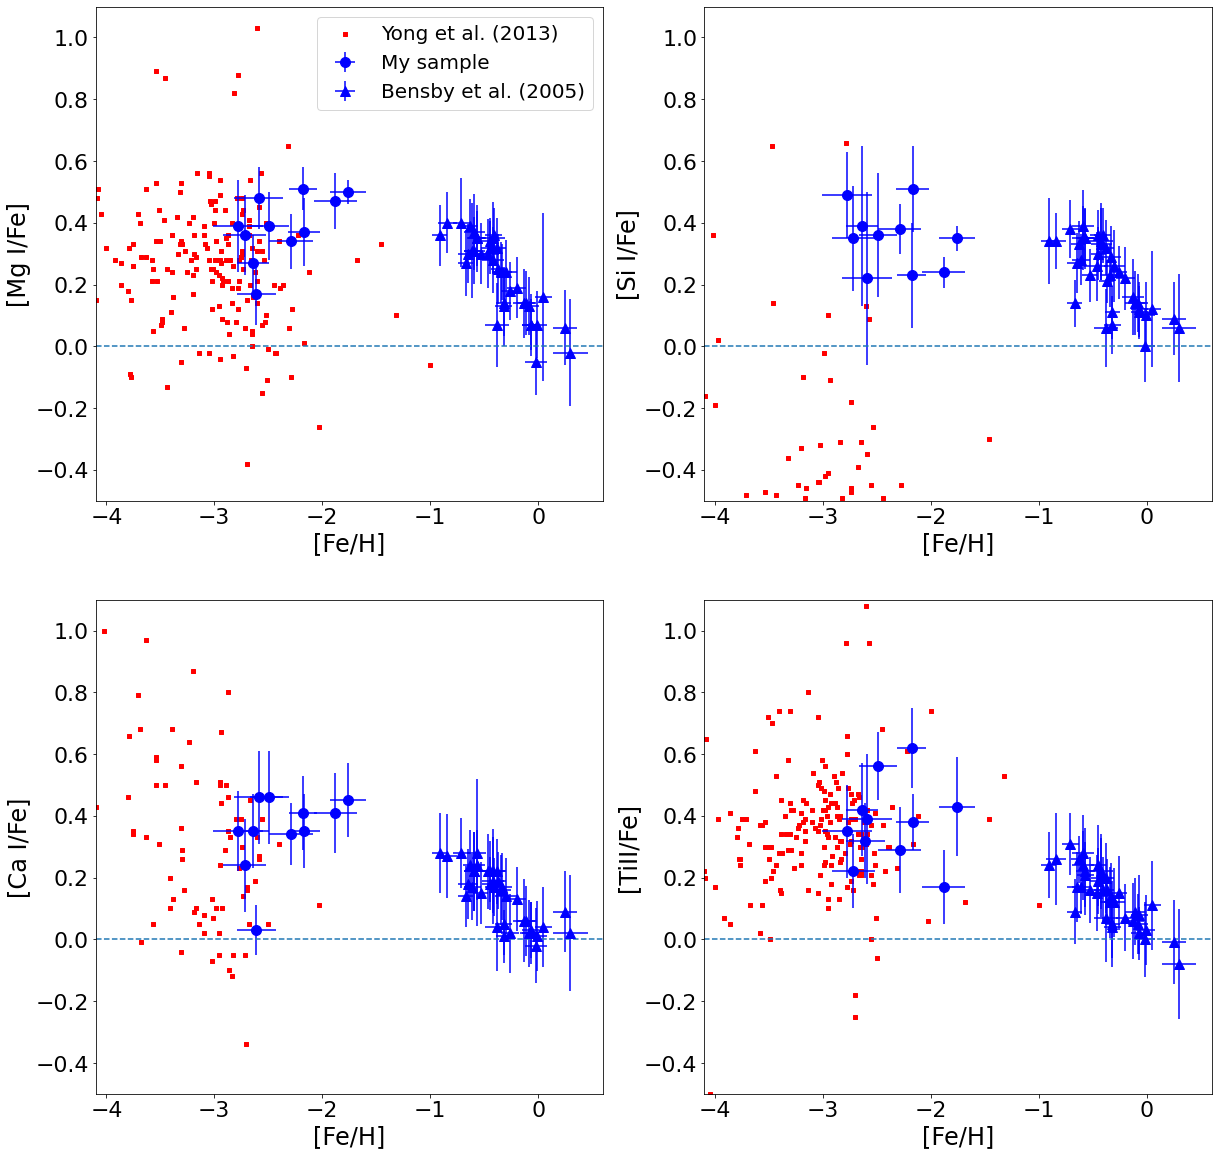

<ipython-input-7-67d9bd93b16a>:120: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  f.savefig(file_name,bbox='tight')


In [30]:
# Make a plot with only 4 elements: Mg, Si, Ca, Ti
# List the desired elem
abund_elem4 = [12.0, 14.0, 20.0, 22.1]
abund_labels4 = ['[Mg I/Fe]','[Si I/Fe]','[Ca I/Fe]','[TiII/Fe]']
all_elem4 = np.array(all_elem)[[0,2,3,5]]
all_elem_std4 = np.array(all_elem_std)[[0,2,3,5]]

make_plots_errorbar(2,2,all_elem4,all_elem_std4,feh_disk=[],disk_elem=[],xlim=[-4.1,0.6],ylim=[-0.5,1.1],elem_labels=abund_labels4,file_name='mwtd_abund4_plots_err_0721.pdf')

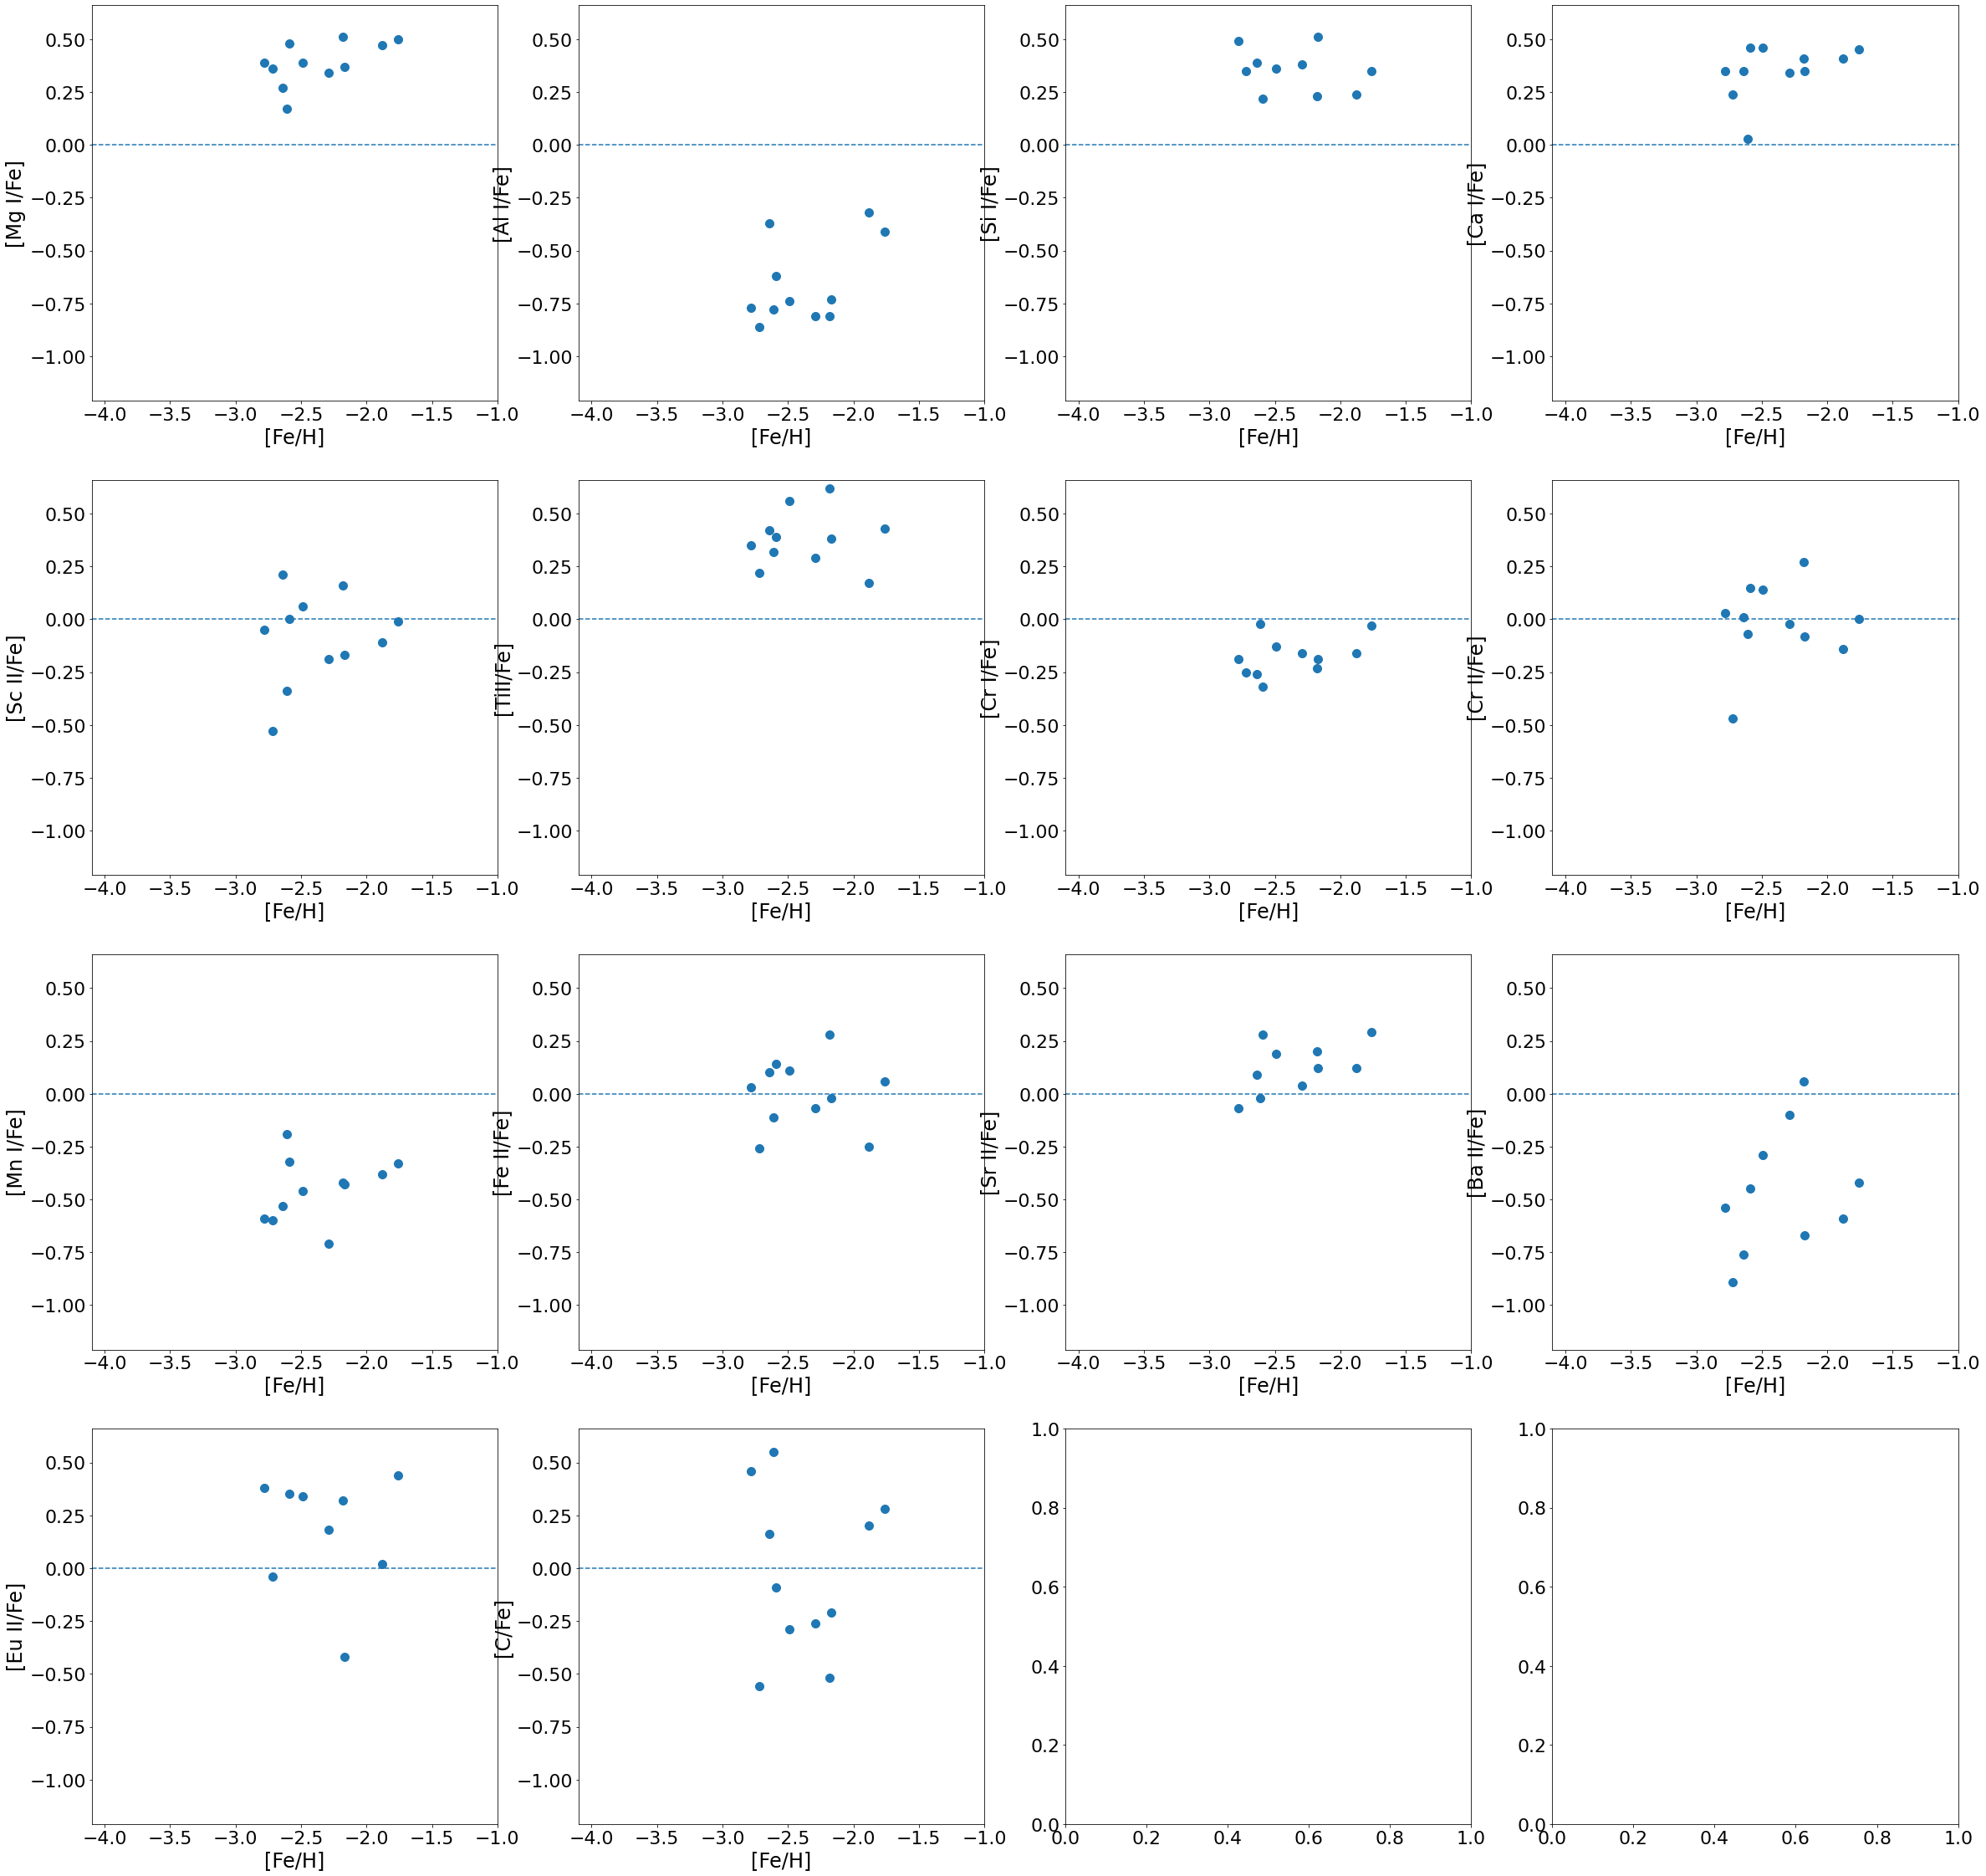

<ipython-input-7-67d9bd93b16a>:67: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  f.savefig(file_name,bbox='tight')


In [31]:
make_plots(4,4,all_elem,feh_disk=[],disk_elem=[],elem_labels=abund_labels,file_name='mwtd_abund_plots_0721.pdf')

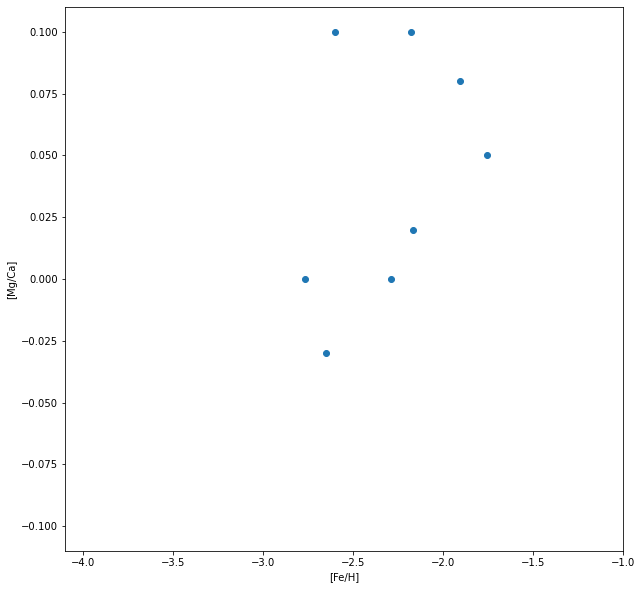

In [10]:
# Try to plot [Ca/Mg]
cafe_all = []
mgfe_all = []
feh_all = []
for i in range(len(smss_list)):
    mgfe_ind = np.where(abund_data[i]['species'] == 12.)[0][0]
    cafe_ind = np.where(abund_data[i]['species'] == 20.)[0][0]
    feh_ind = np.where(abund_data[i]['species'] == 26.)[0][0]
    mgfe_temp = abund_data[i].loc[mgfe_ind,'[X/Fe]']
    cafe_temp = abund_data[i].loc[cafe_ind,'[X/Fe]']
    feh_temp = abund_data[i].loc[feh_ind,'[X/H]']
    mgfe_all.append(mgfe_temp)
    cafe_all.append(cafe_temp)
    feh_all.append(feh_temp)

cafe_all, mgfe_all, feh_all = np.array(cafe_all), np.array(mgfe_all), np.array(feh_all)
    
plt.figure(figsize=[10,10])
plt.scatter(feh_all,mgfe_all-cafe_all)
plt.xlim([-4.1,-1])
plt.ylim([-0.11,0.11])
plt.xlabel('[Fe/H]')
plt.ylabel('[Mg/Ca]')
plt.show()

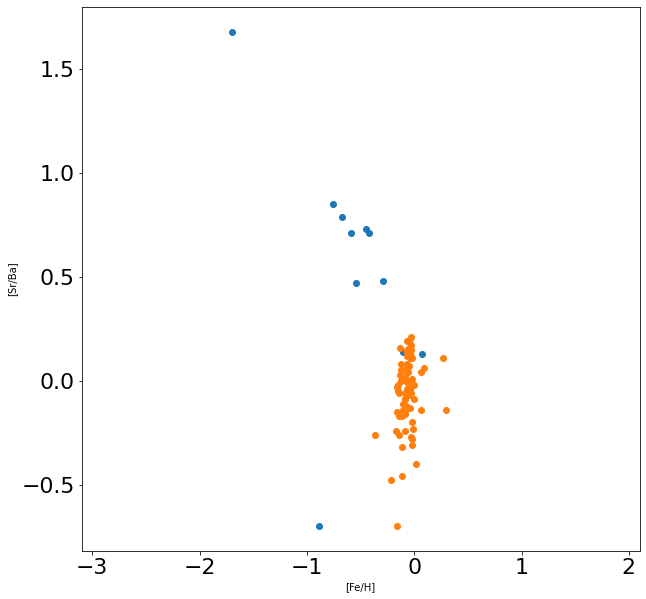

In [30]:
# Try to plot [Sr/Ba] with Yong's stars
srfe_all = []
bafe_all = []
feh_all = []
for i in range(len(smss_list)):
    srfe_ind = np.where(abund_data[i]['species'] == 38.1)[0][0]
    bafe_ind = np.where(abund_data[i]['species'] == 56.1)[0][0]
    feh_ind = np.where(abund_data[i]['species'] == 26.)[0][0]
    srfe_temp = abund_data[i].loc[srfe_ind,'[X/Fe]']
    bafe_temp = abund_data[i].loc[bafe_ind,'[X/Fe]']
    feh_temp = abund_data[i].loc[feh_ind,'[X/H]']
    srfe_all.append(srfe_temp)
    bafe_all.append(bafe_temp)
    feh_all.append(feh_temp)

bafe_all, srfe_all, feh_all = np.array(bafe_all), np.array(srfe_all), np.array(feh_all)
    
plt.figure(figsize=[10,10])
plt.scatter(bafe_all,srfe_all-bafe_all)
plt.scatter(bnb2014_td['Ba/Fe'],bnb2014_td['Ba/Fe']-(bnb2014_td['[Sr/H]']-bnb2014_td['[Fe/H]']))
plt.xlim([-3.1,2.1])
# plt.ylim([-0.11,0.11])
plt.xlabel('[Fe/H]')
plt.ylabel('[Sr/Ba]')
plt.show()

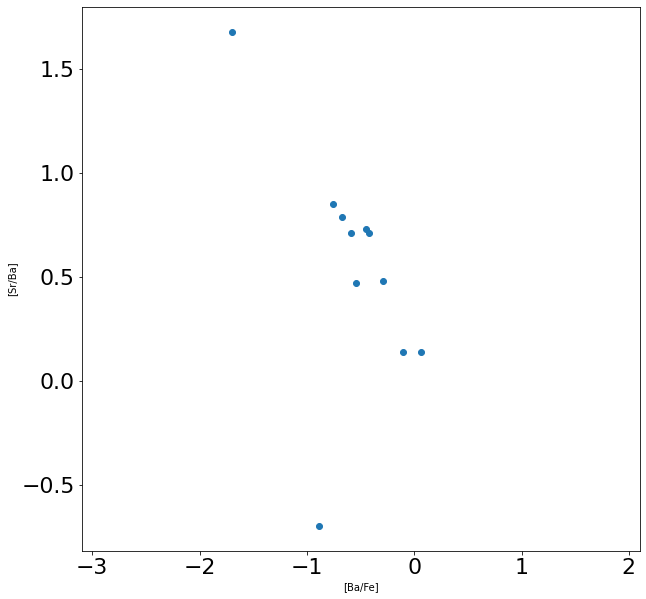

In [107]:
# Try to plot [Sr/Ba] with Yong's stars
srfe_all = []
bafe_all = []
feh_all = []
for i in range(len(smss_list)):
    srfe_ind = np.where(abund_data[i]['species'] == 38.1)[0][0]
    bafe_ind = np.where(abund_data[i]['species'] == 56.1)[0][0]
    feh_ind = np.where(abund_data[i]['species'] == 26.)[0][0]
    srfe_temp = abund_data[i].loc[srfe_ind,'[X/Fe]']
    bafe_temp = abund_data[i].loc[bafe_ind,'[X/Fe]']
    feh_temp = abund_data[i].loc[feh_ind,'[X/H]']
    srfe_all.append(srfe_temp)
    bafe_all.append(bafe_temp)
    feh_all.append(feh_temp)

bafe_all, srfe_all, feh_all = np.array(bafe_all), np.array(srfe_all), np.array(feh_all)
    
plt.figure(figsize=[10,10])
plt.scatter(bafe_all,srfe_all-bafe_all)
plt.xlim([-3.1,2.1])
# plt.ylim([-0.11,0.11])
plt.xlabel('[Ba/Fe]')
plt.ylabel('[Sr/Ba]')
plt.show()

In [31]:
abund_data[0]

,species,N,logeps,stdev,stderr,[X/H],[X/Fe]
0,3.0,1,1.20,0.00,0.00,0.15,2.59
1,8.0,2,7.67,0.26,0.18,-1.02,1.42
2,11.0,2,4.10,0.06,0.04,-2.14,0.30
3,12.0,5,5.48,0.04,0.02,-2.12,0.32
4,13.0,1,3.60,0.00,0.00,-2.85,-0.41
5,14.0,2,5.55,0.14,0.10,-1.96,0.47
6,19.0,1,3.06,0.00,0.00,-1.97,0.46
7,20.0,18,4.20,0.12,0.03,-2.14,0.30
8,22.0,14,2.69,0.19,0.05,-2.26,0.18
9,23.0,1,1.75,0.00,0.00,-2.18,0.26
